In [1]:
import cv2
from matplotlib import pyplot as plt
import glob

In [2]:
# pct 3 (V >= 0.4) & (0.2 < S < 0.6) & (0 < H < 25 | 335 < H <= 360)
# tradus fct 1 = 0.4 * 255
# tradus fct 1 = 0.2 * 255
# tradus fct 1 = 0.6 * 255
# tradus fct 1 = 25 * 0.5
# tradus fct 1 = 335 * 0.2
# tradus fct 1 = 360 * 0.2



In [3]:
def imread(path):
    return cv2.imread(path)[:,:,::-1]

In [4]:
images = []
for img_path in glob.glob('*.jpg'):
    images.append(imread(img_path))

In [5]:
# for ima in images:
#     plt.figure()
#     plt.imshow(ima)

In [49]:
def filterBy(img, fn_filter):
    newImage = img.copy()
    for i in range(0,img.shape[0]): # Change
        for j in range(0,img.shape[1]): # Change
            pixel = img[i,j]
            if not fn_filter(pixel):
                newImage[i,j]=0
            else:
                newImage[i,j]=255
    return newImage

In [50]:
def filterByHSV(img, fn_filter):
    img_v = img.copy()
    newImage = cv2.cvtColor(img_v, cv2.COLOR_RGB2HSV)
    for i in range(0,img.shape[0]): # Change
        for j in range(0,img.shape[1]): # Change
            pixel = newImage[i,j]
            if not fn_filter(pixel):
                img_v[i,j]=0
            else:
                img_v[i,j]=255
    return img_v

In [51]:
def filterByYCbCr(img, fn_filter):
    img_v = img.copy()
    newImage = cv2.cvtColor(img_v, cv2.COLOR_RGB2YCR_CB)
    for i in range(0,img.shape[0]): # Change
        for j in range(0,img.shape[1]): # Change
            pixel = newImage[i,j]
            if not fn_filter(pixel):
                img_v[i,j]=0
            else:
                img_v[i,j]=255
    return img_v

In [52]:
def fn_filter_1(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return R > 95 and G > 40 and B > 20 and (max(R,G,B) - min(R,G,B)) > 15 and abs(R-G) > 15 and R > G and R > B

In [53]:
def fn_filter_2(a):
    R = int(a[0])
    G = int(a[1])
    B = int(a[2])
    return (R/(G+0.00001) > 1.185) and ((R*B)/pow(R+G+B+0.00001, 2) > 0.107) and ((R*G)/pow(R+G+B+0.00001, 2) > 0.112)

In [54]:
def fn_filter_3(a):
    H = int(a[0])
    S = int(a[1])
    V = int(a[2])
    return V >= 0.4*255 and (S > 0.2*255 and S < 0.6 *255) and (H < 25*0.5 or H > 335*0.5)

In [55]:
def fn_filter_4(a):
    H = int(a[0])
    S = int(a[1])
    V = int(a[2])
#     print(H,S,V)
    return (H <= 50*0.5) and (S >= 0.23 * 255 and S <= 0.68*255) and (V >= 0.35*255)

In [56]:
def fn_filter_5(a):
    H = int(a[0])
    S = int(a[1])
    V = int(a[2])
#     print(H,S,V)
    return (H < 50*0.5 or H > 340*0.5) and (S >= 0.2) and (V >= 0.35*255)

In [57]:
def fn_filter_6(a):
    Y = int(a[0])
    Cr = int(a[1])
    Cb = int(a[2])
#     print(H,S,V)
    return Y > 80 and (85 <= Cb and Cb <= 135) and (135 < Cr and Cr < 180)

In [58]:
def fn_filter_7(a):
    Y = int(a[0])
    Cr = int(a[1])
    Cb = int(a[2])
#     print(H,S,V)
    return (80 <= Cb and Cb <= 120) and (133 <= Cr and Cr <= 173)

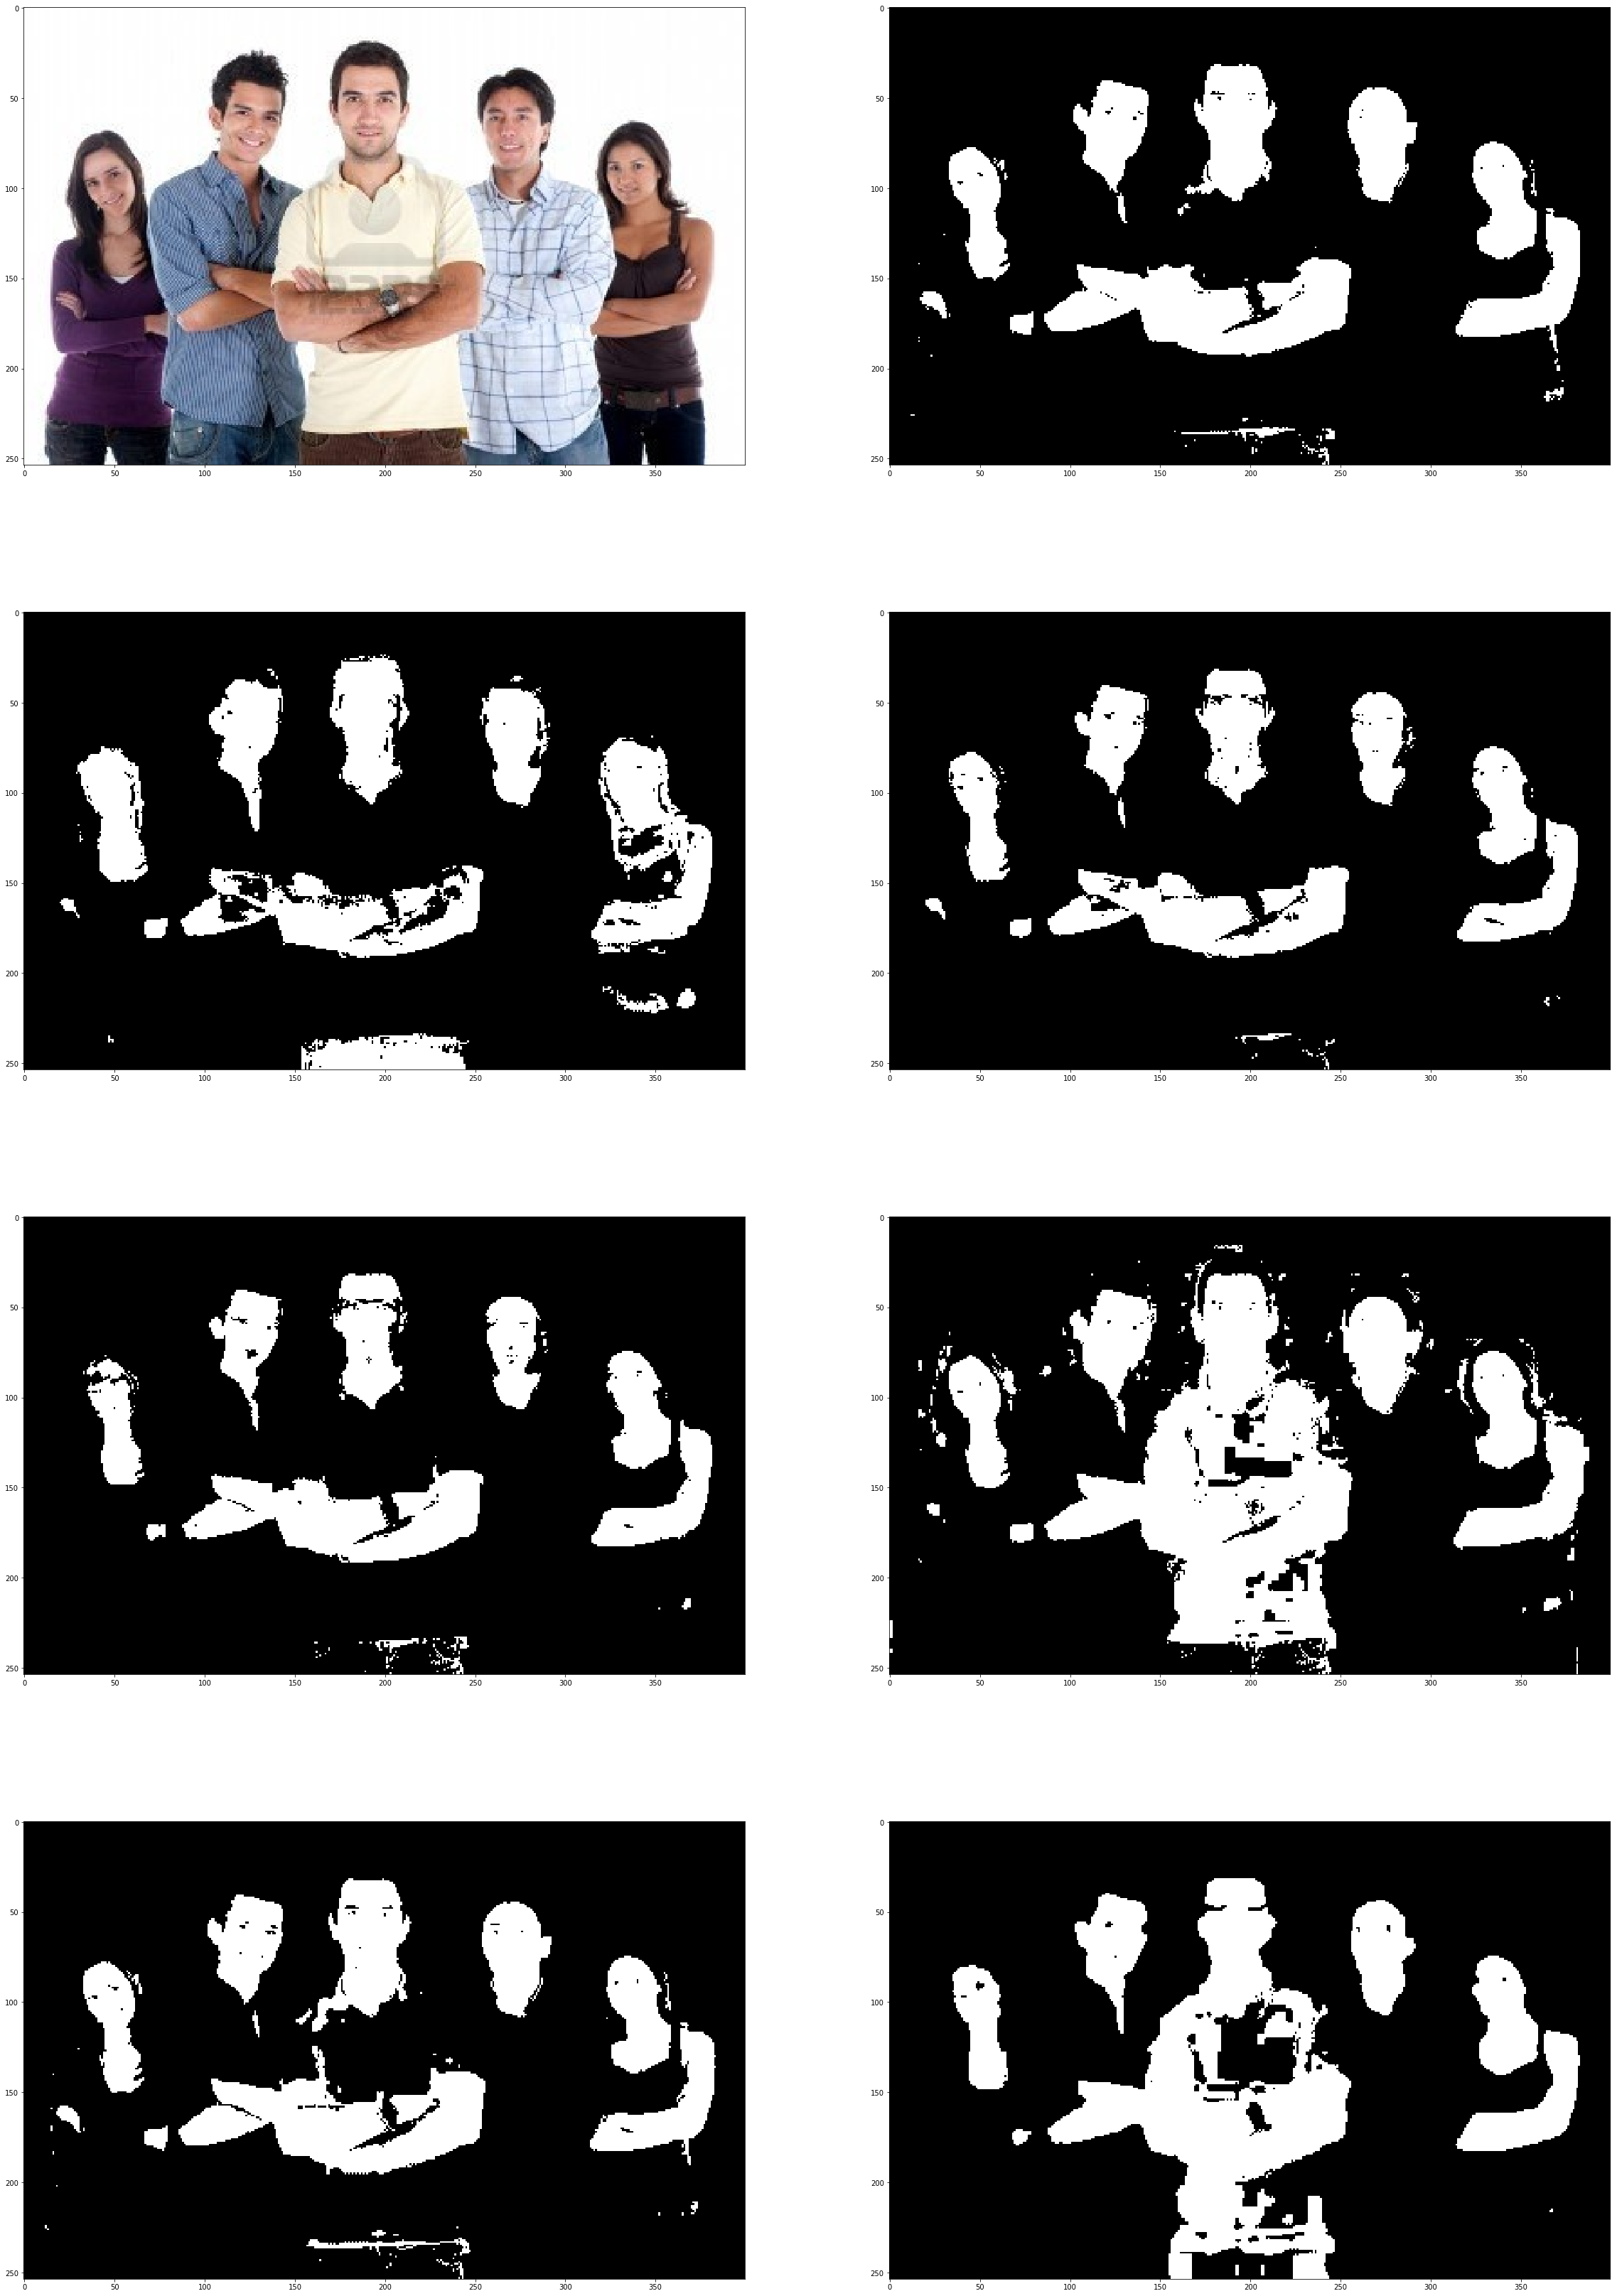

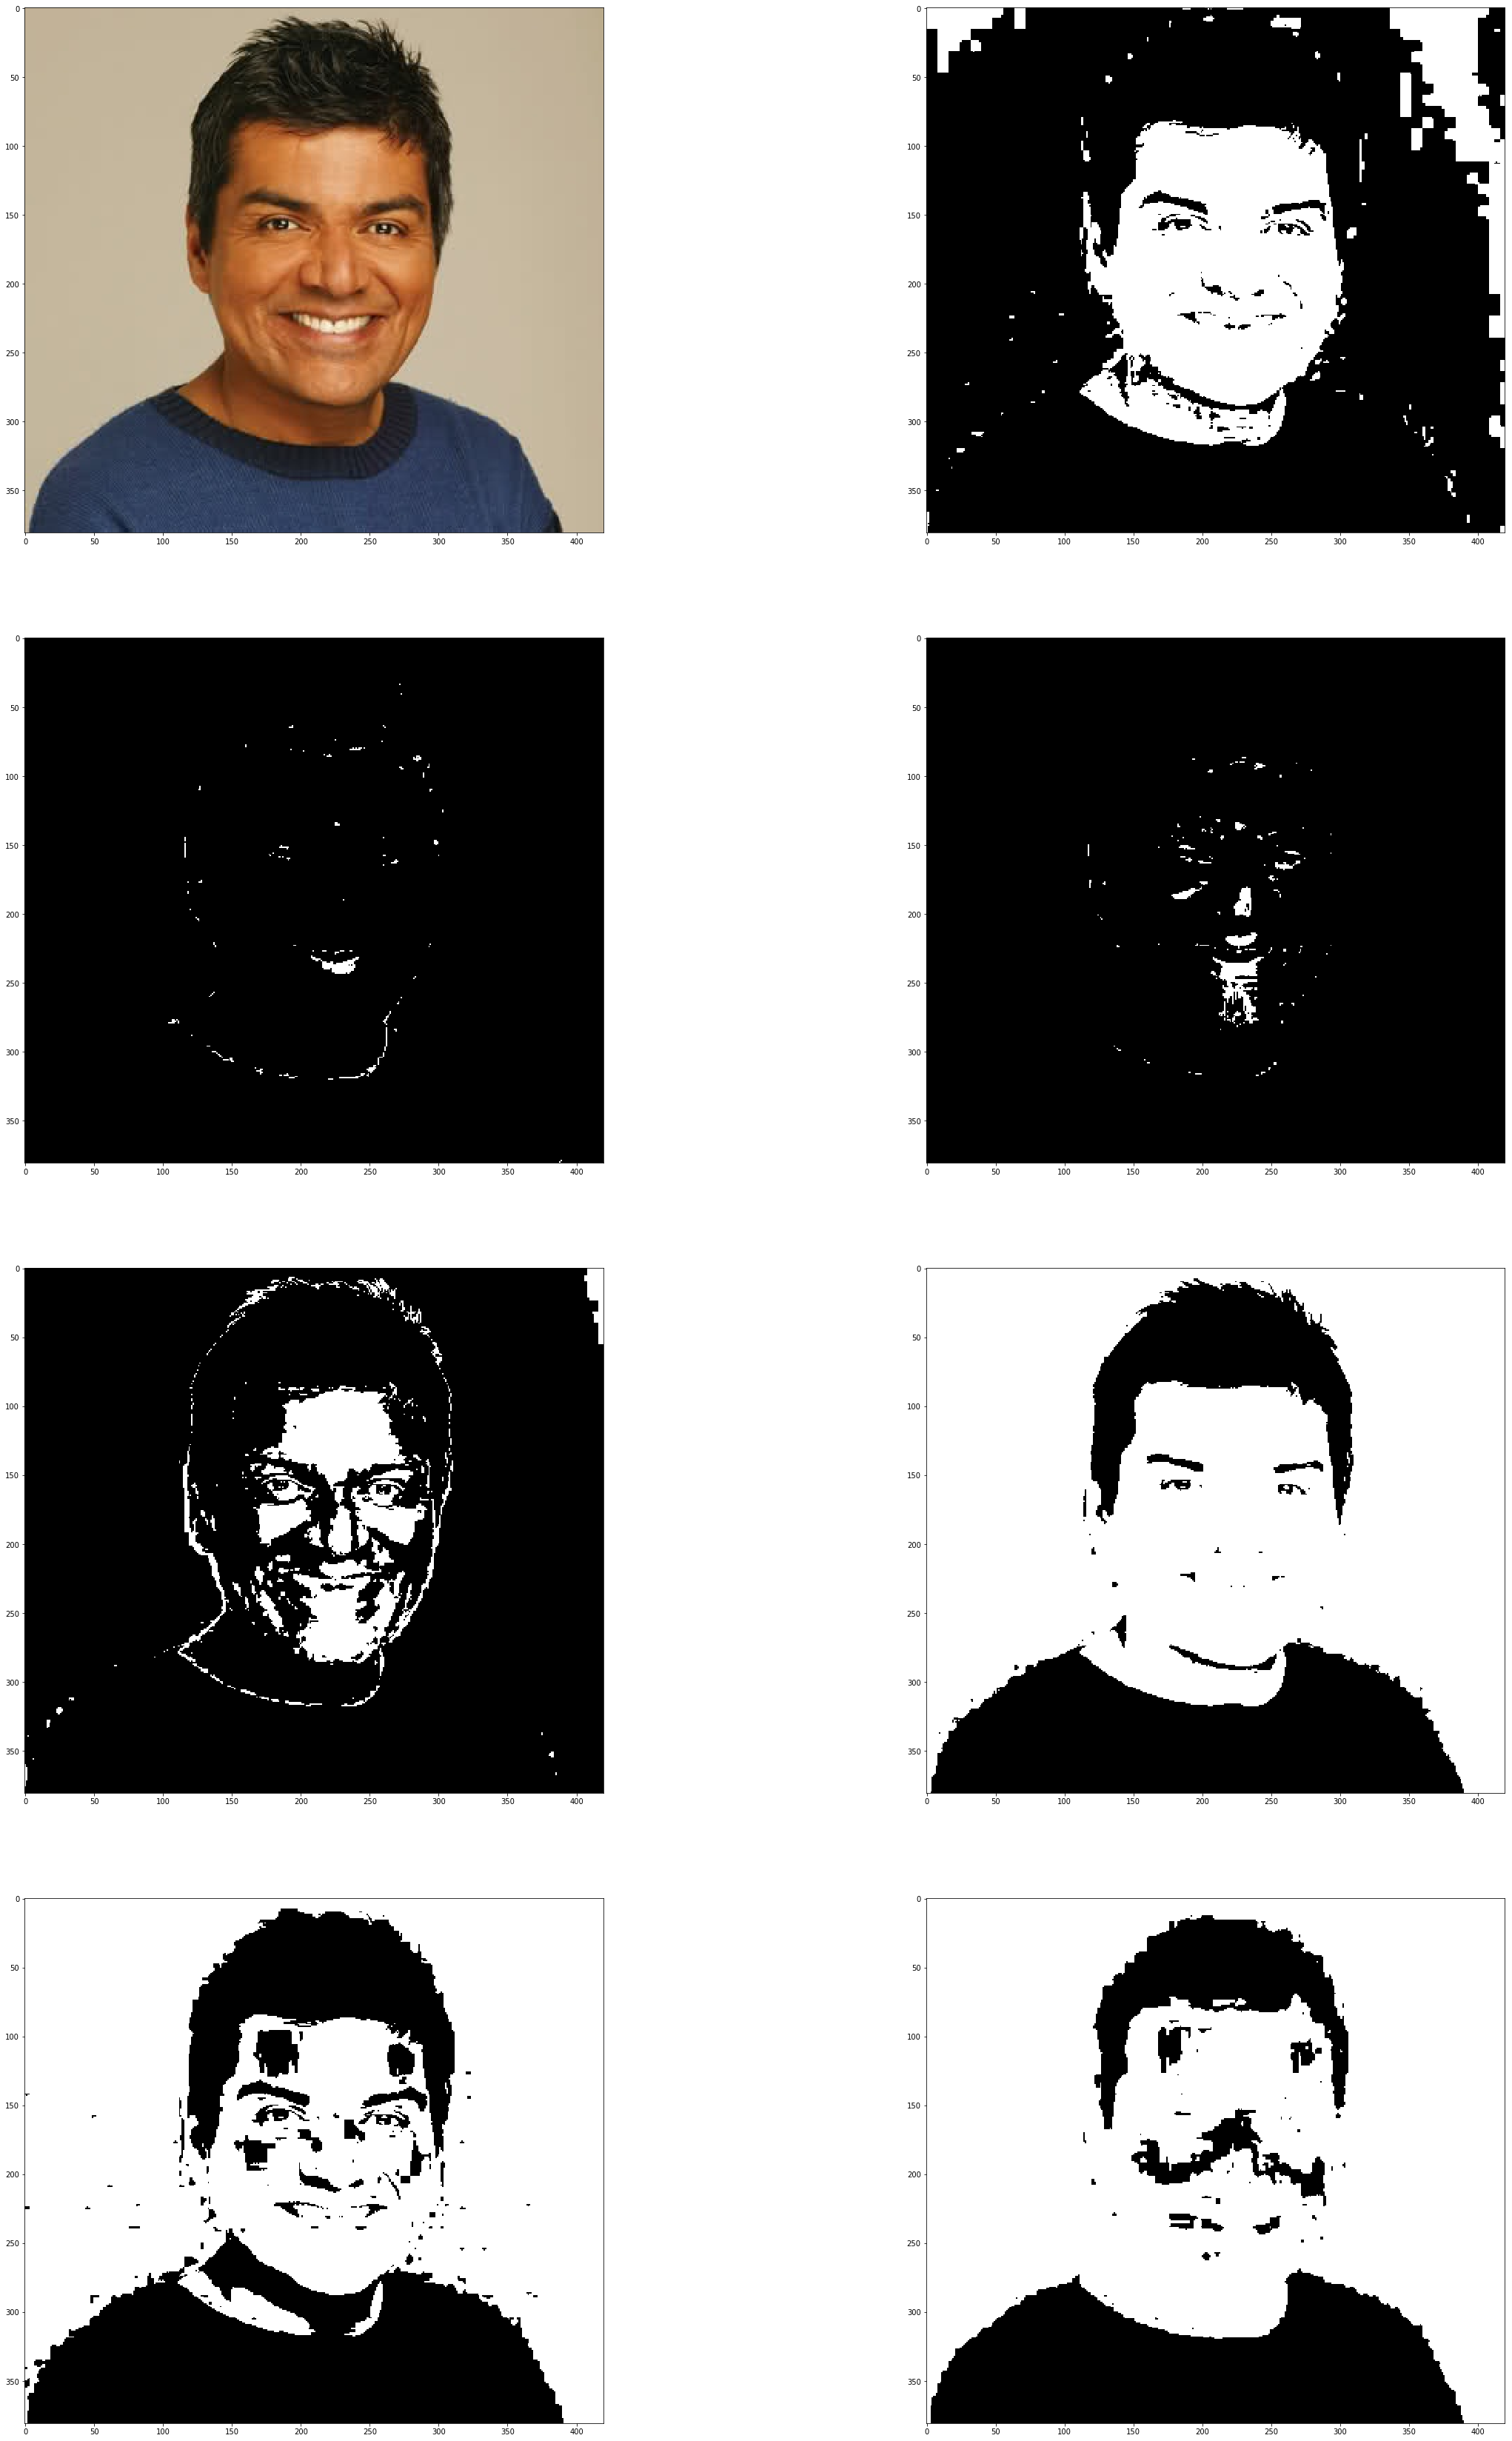

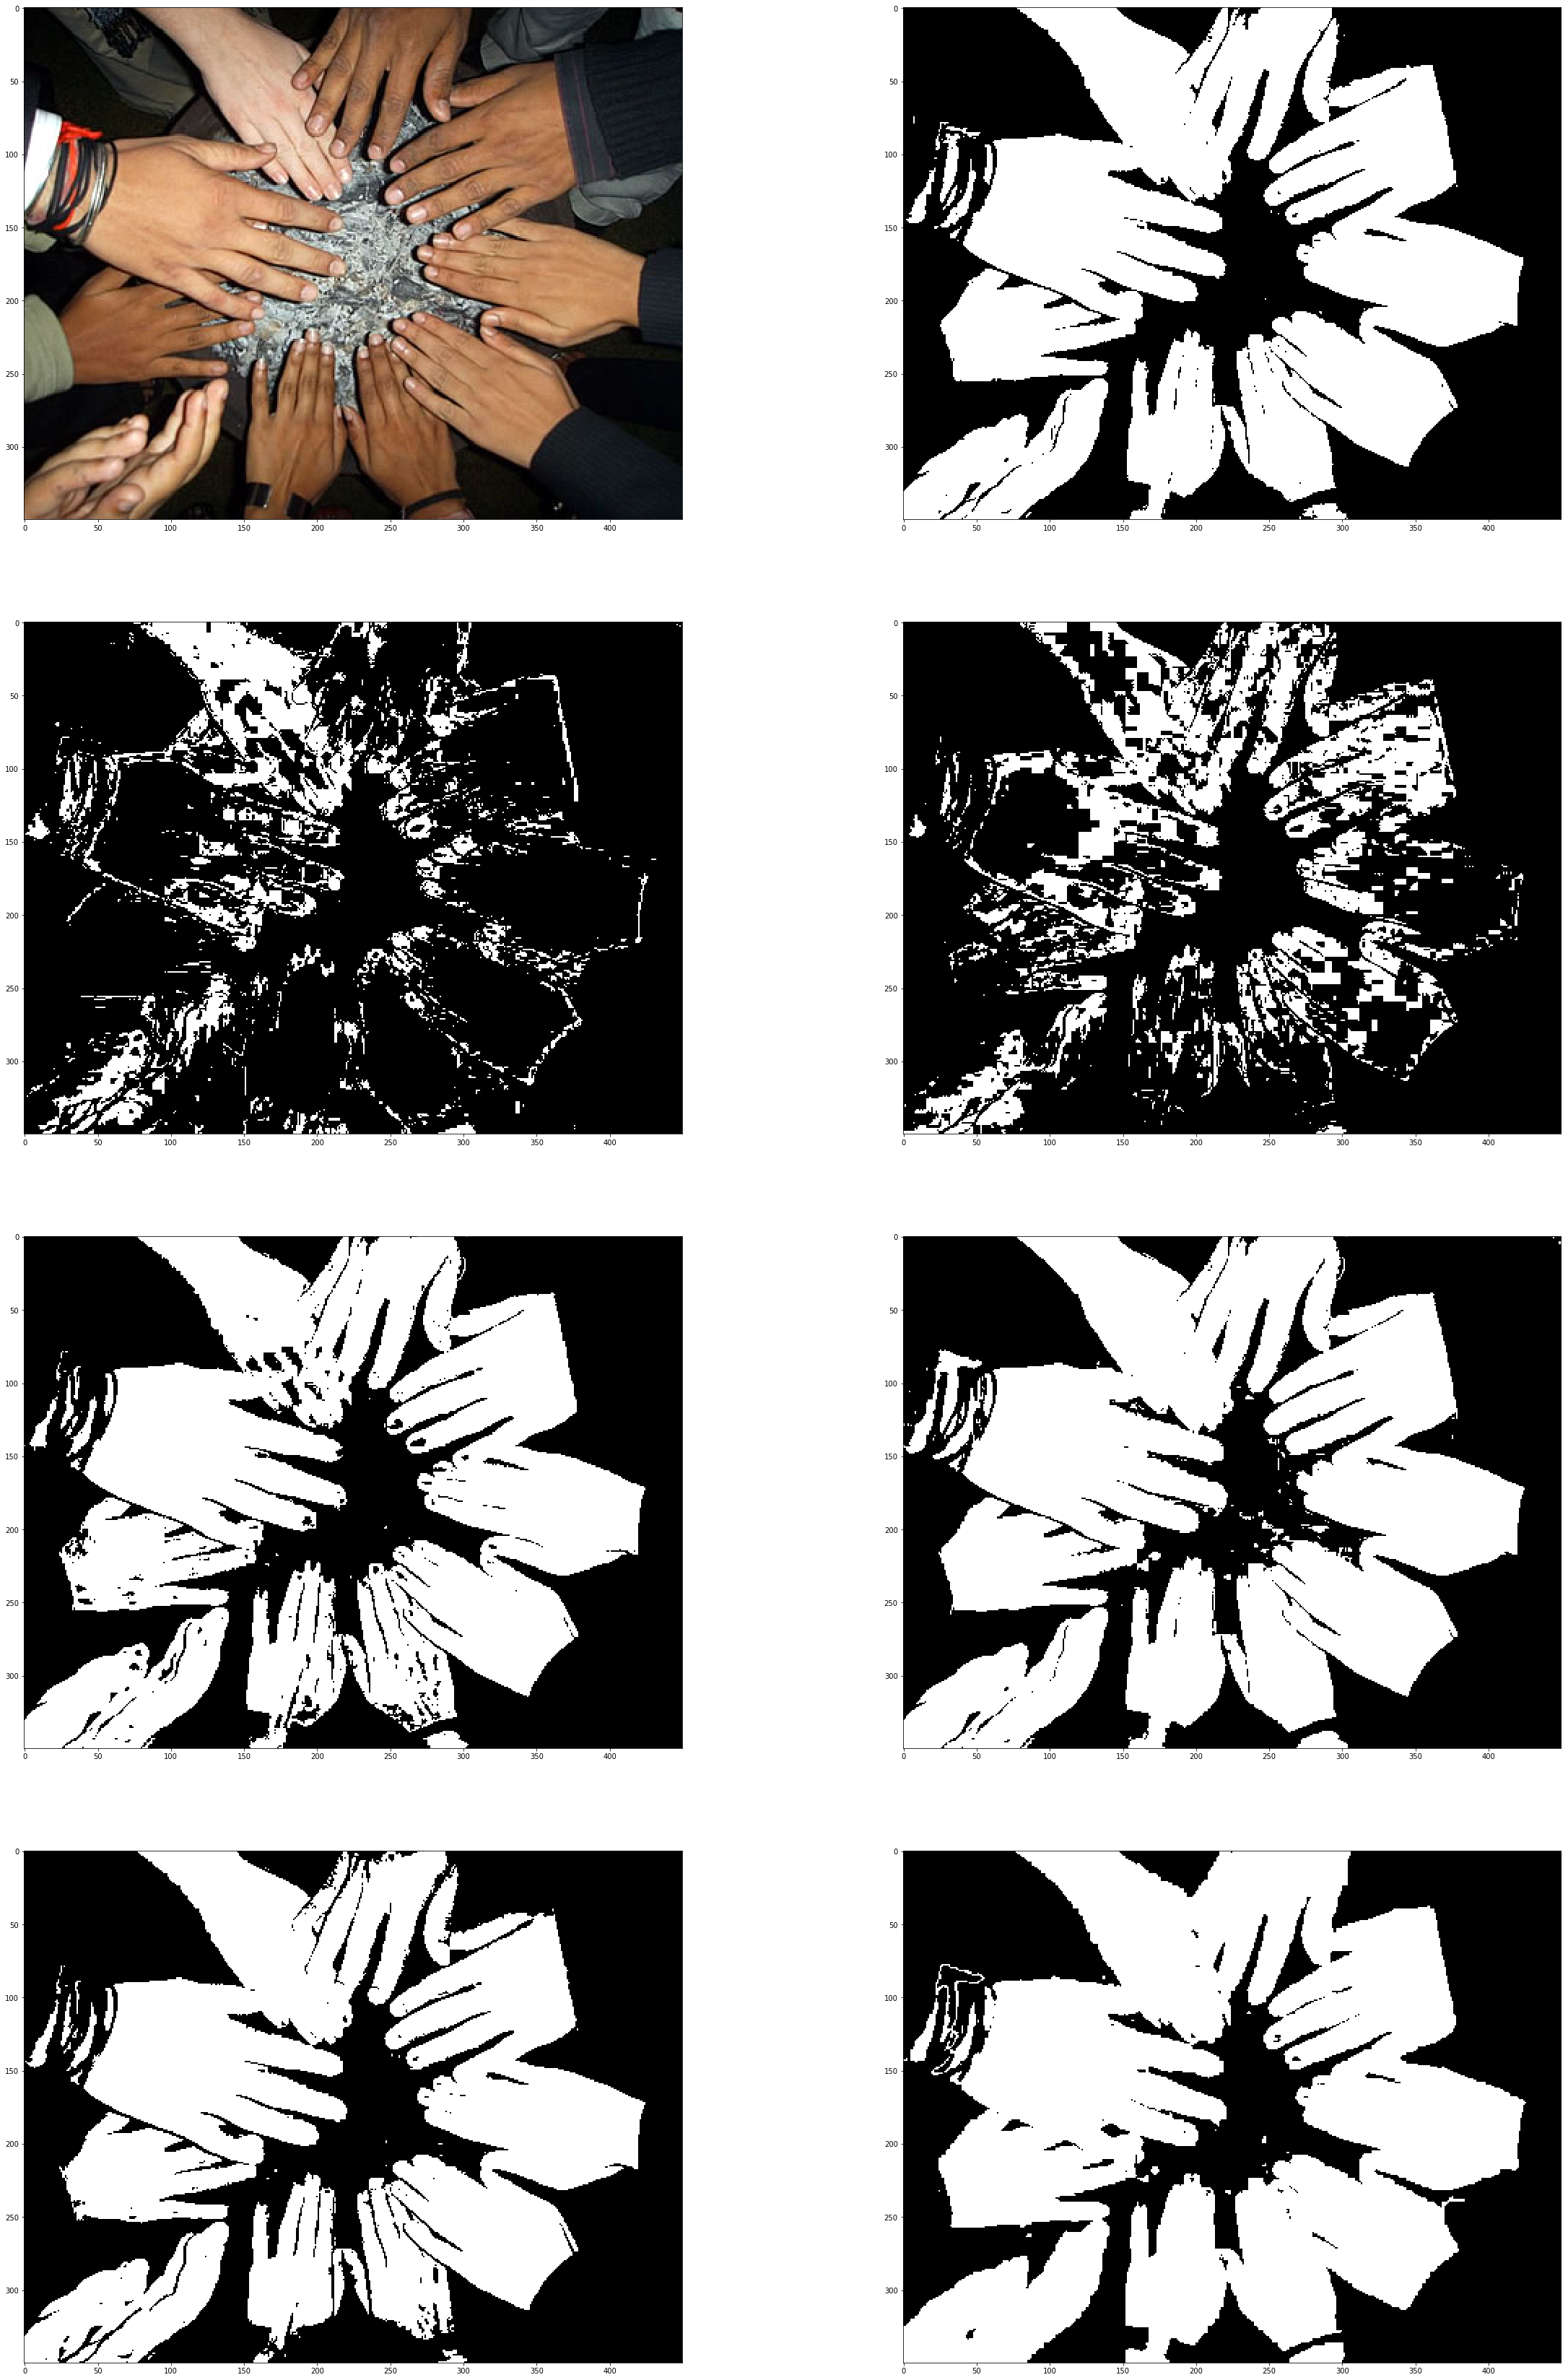

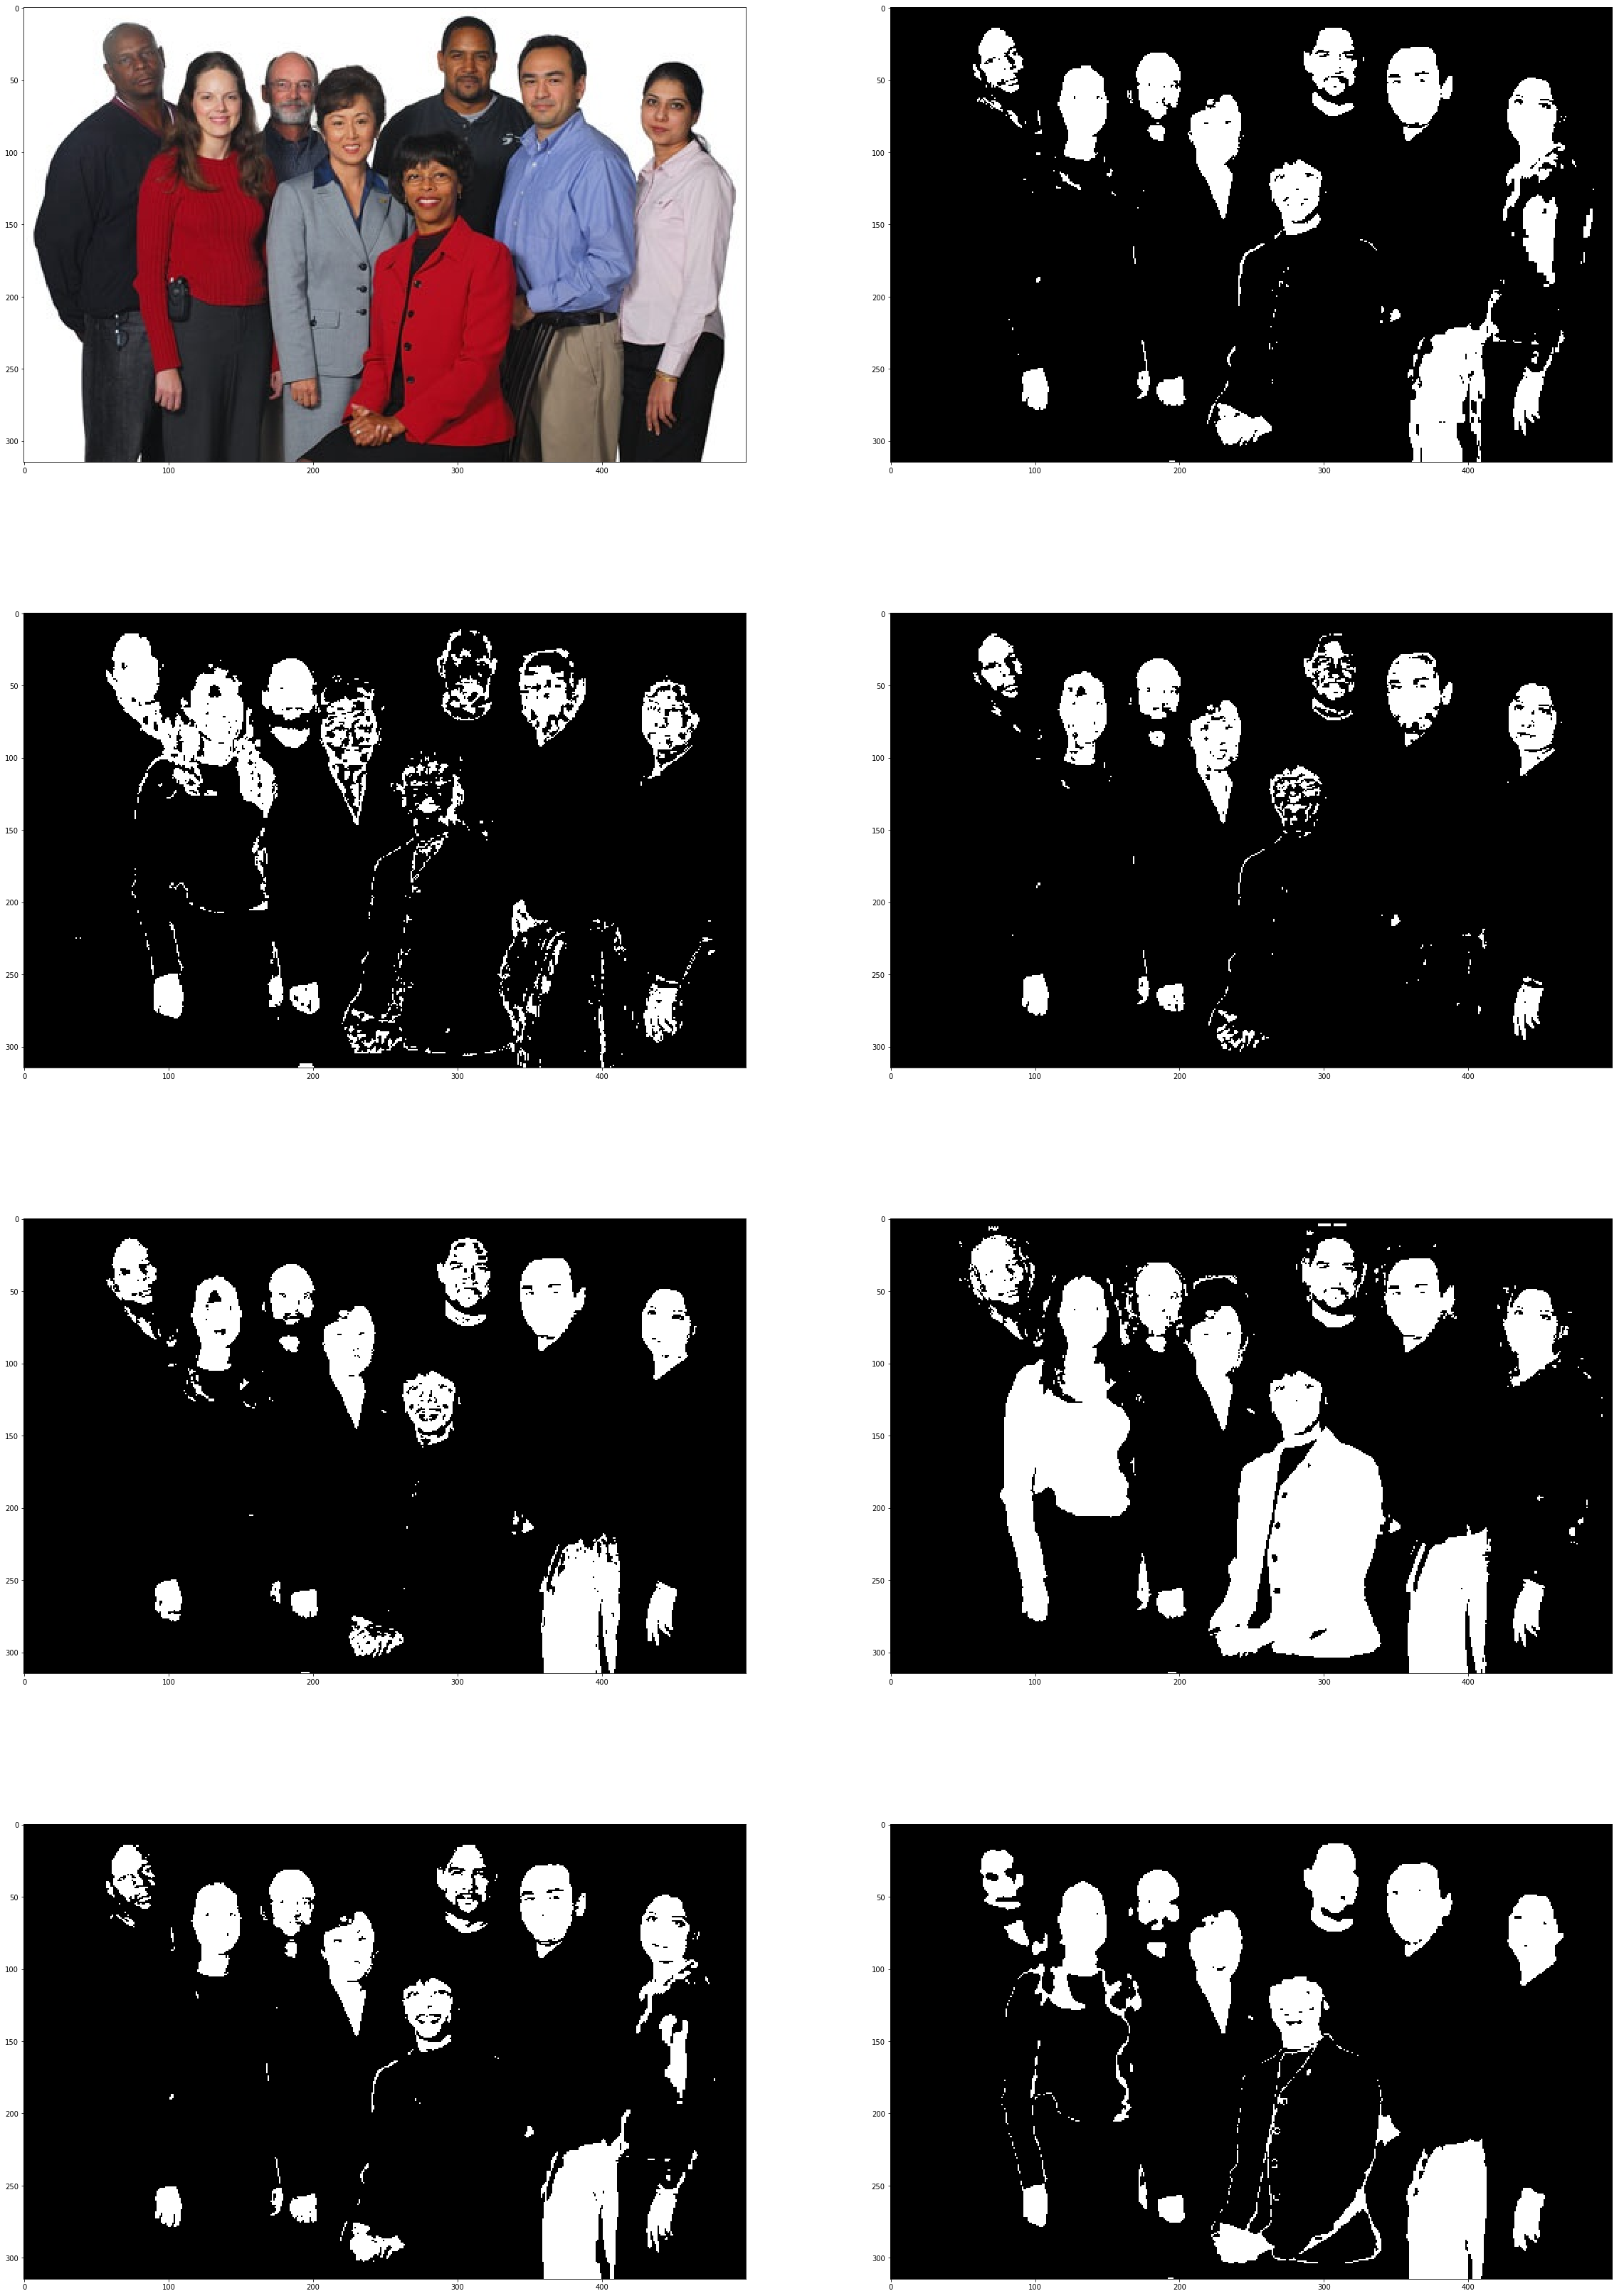

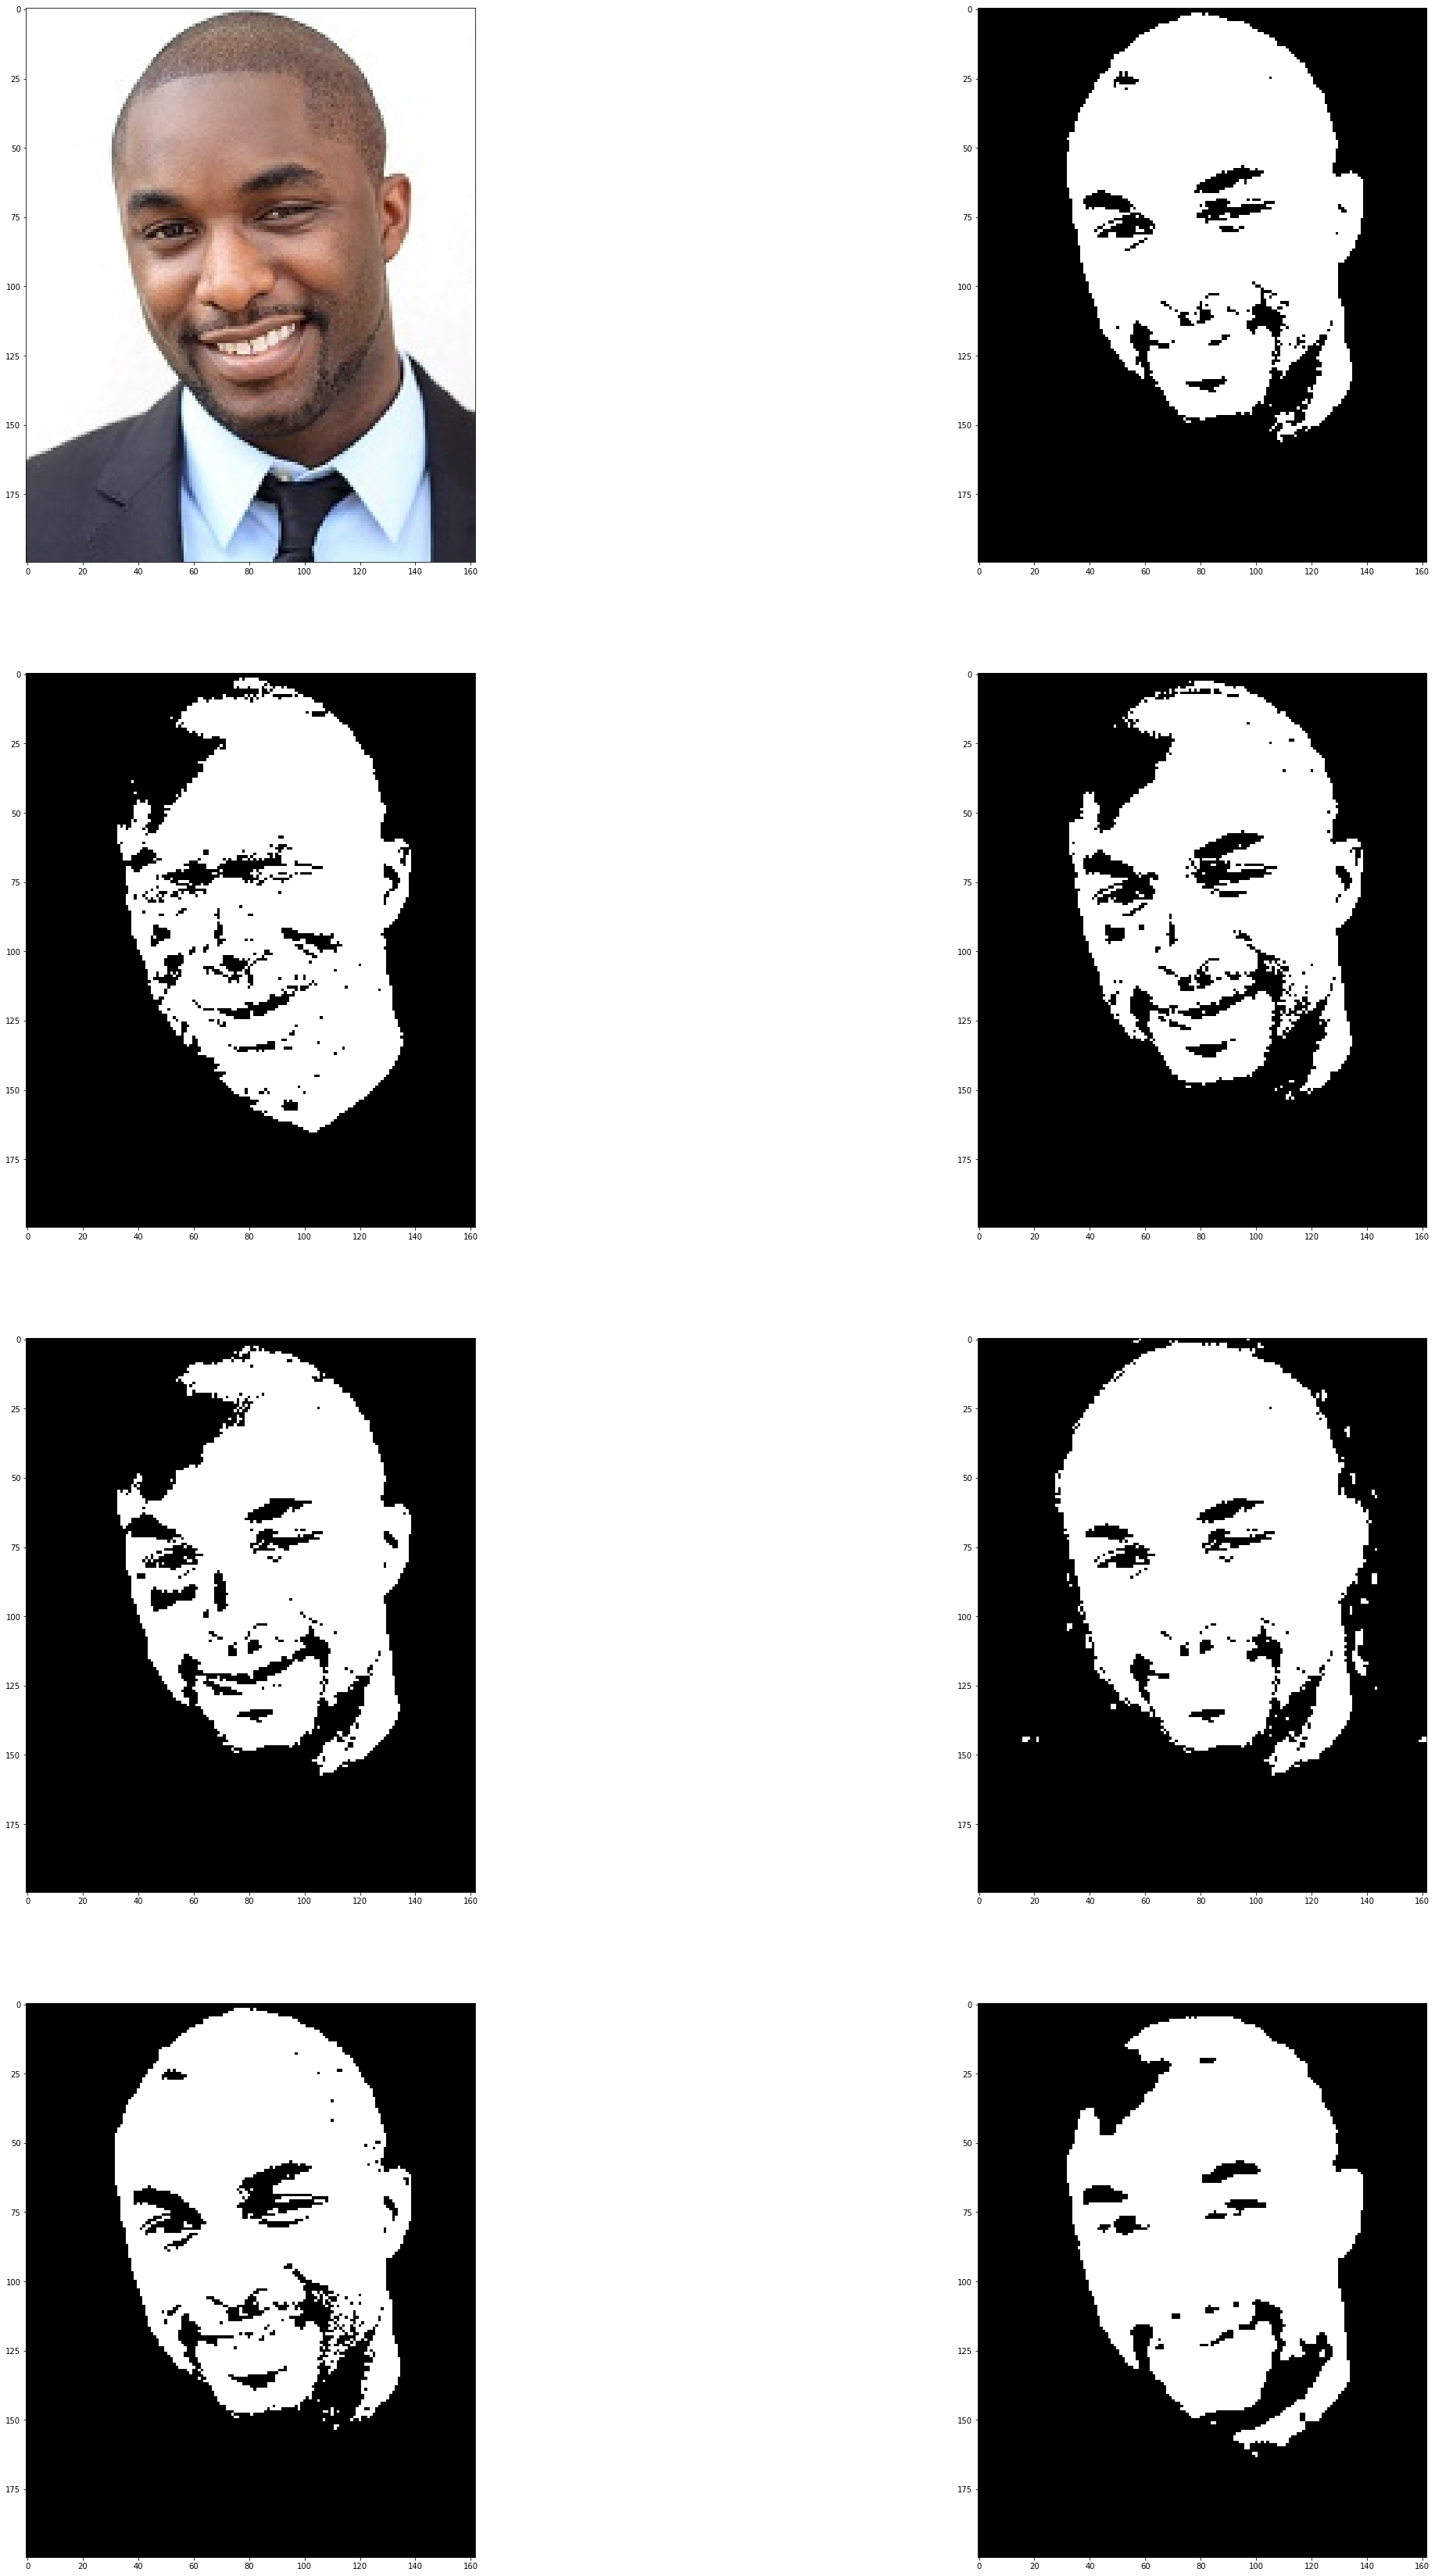

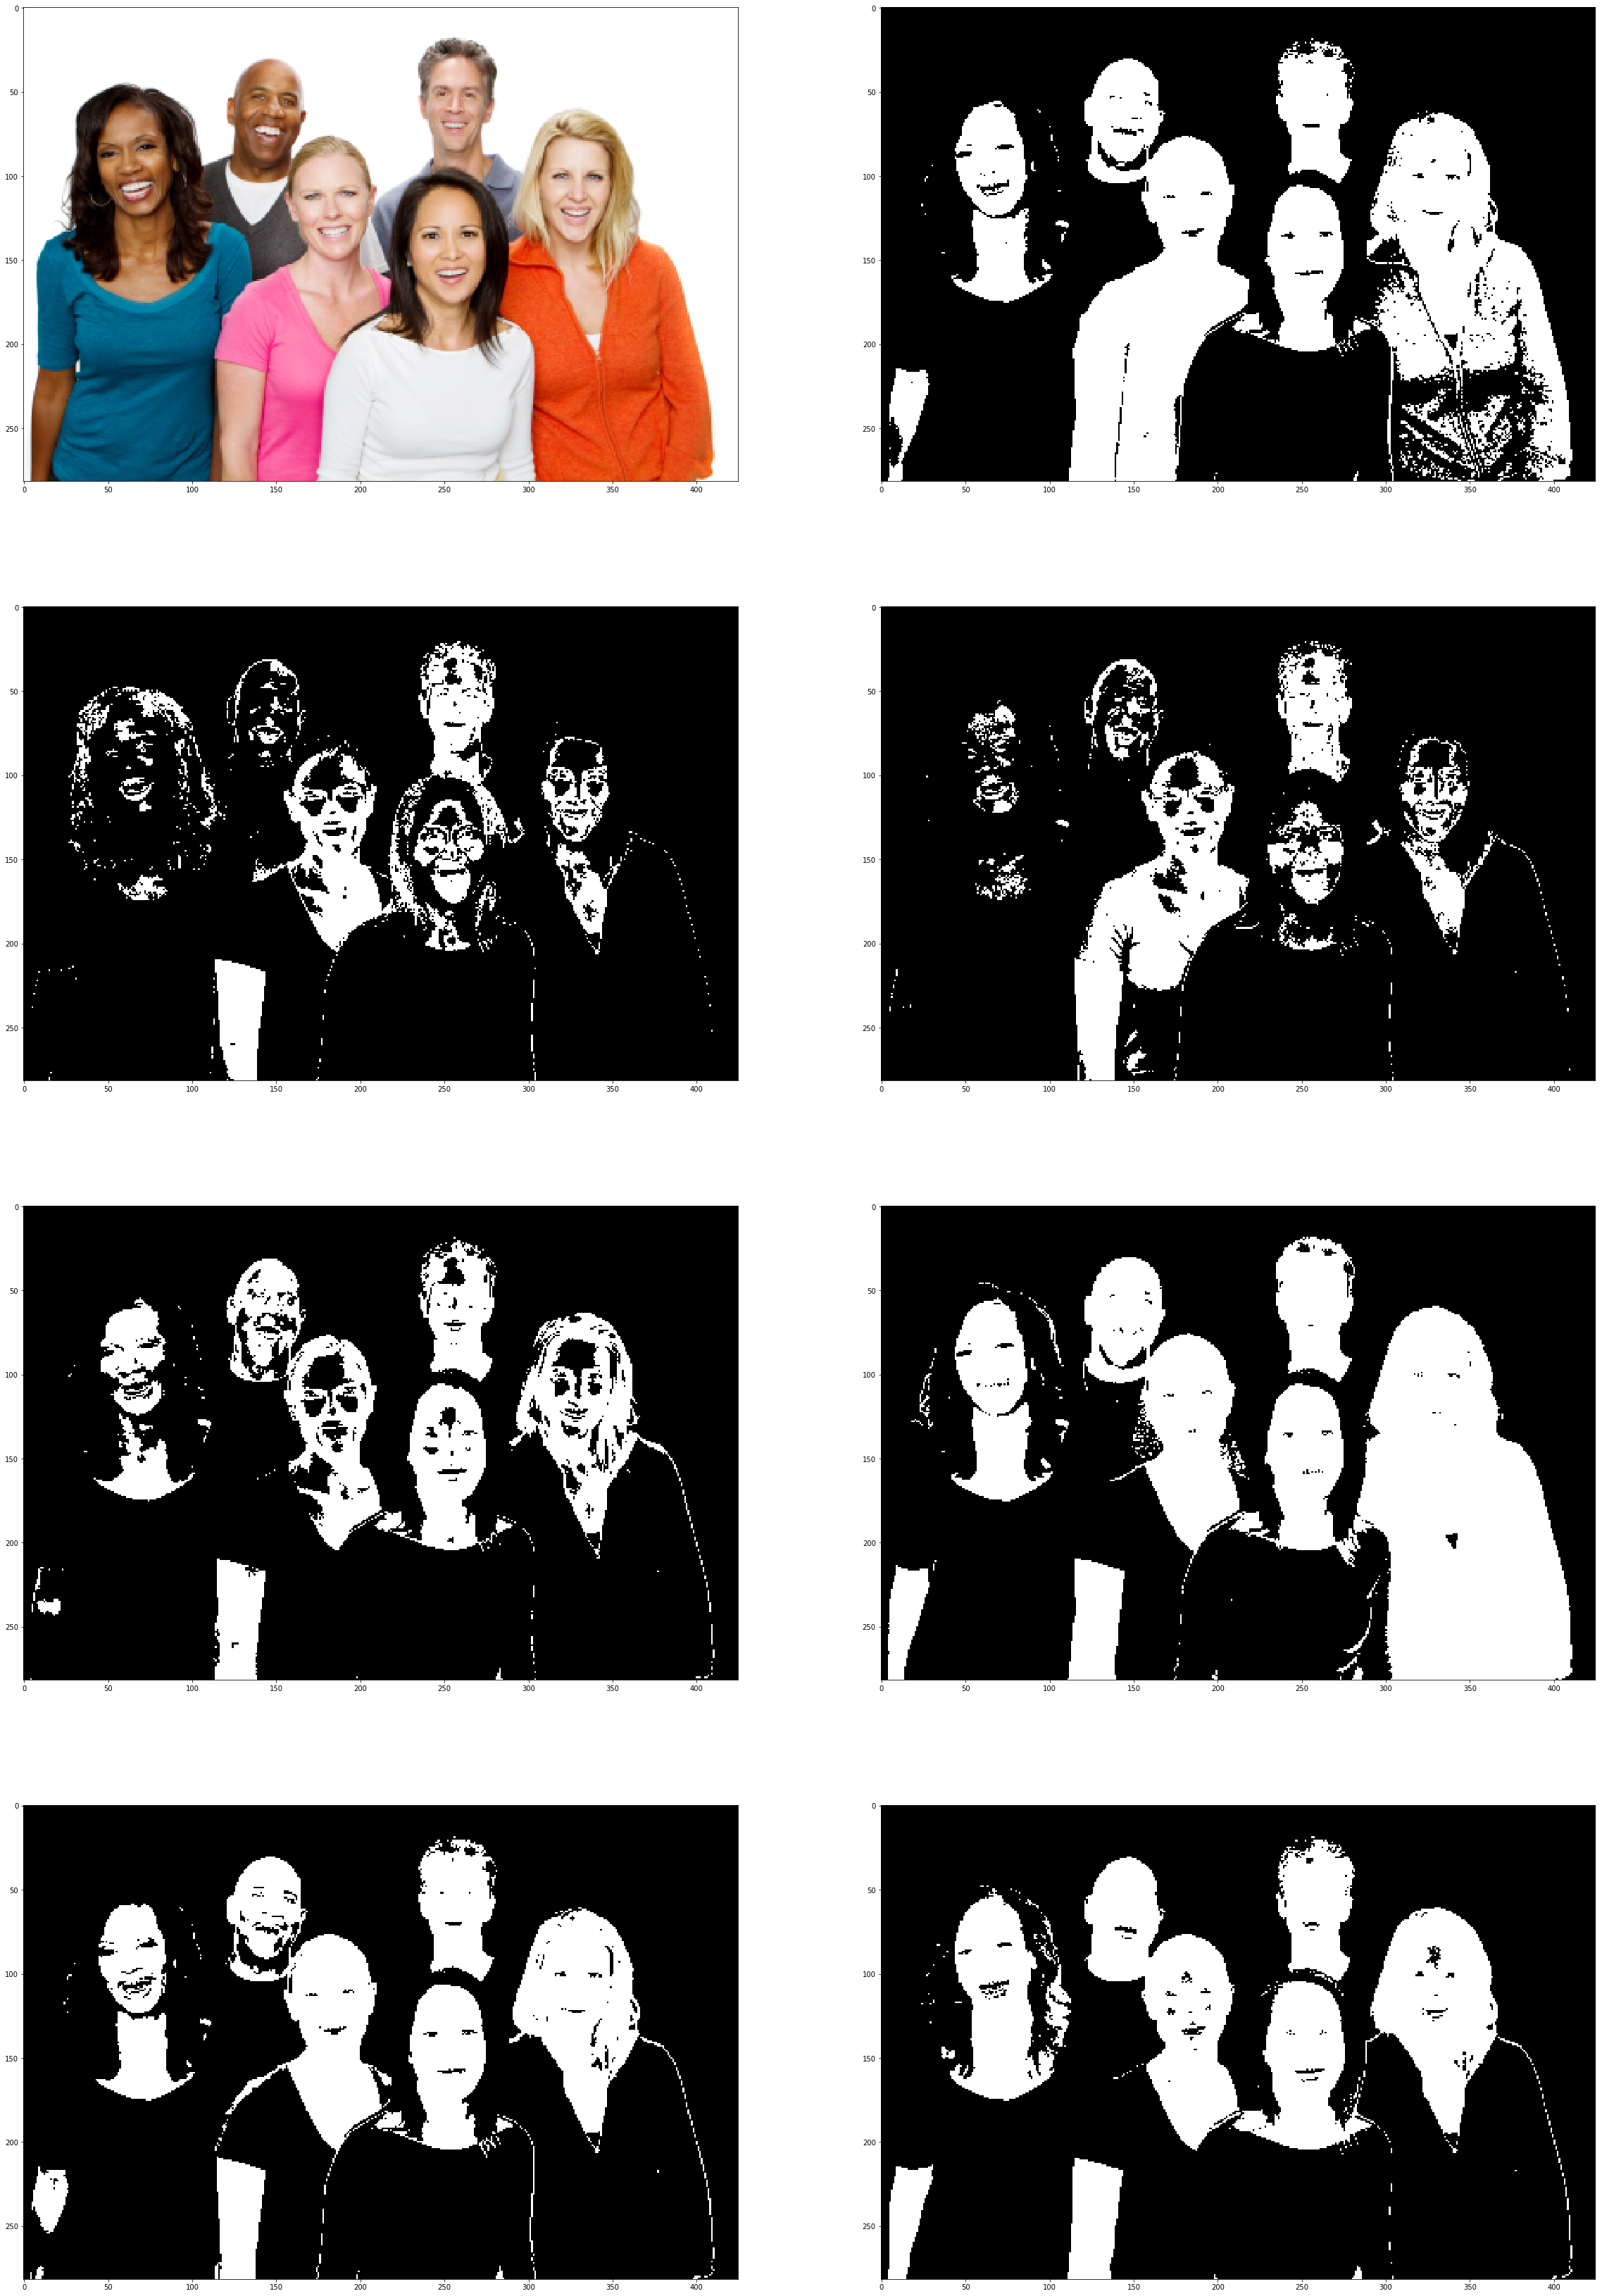

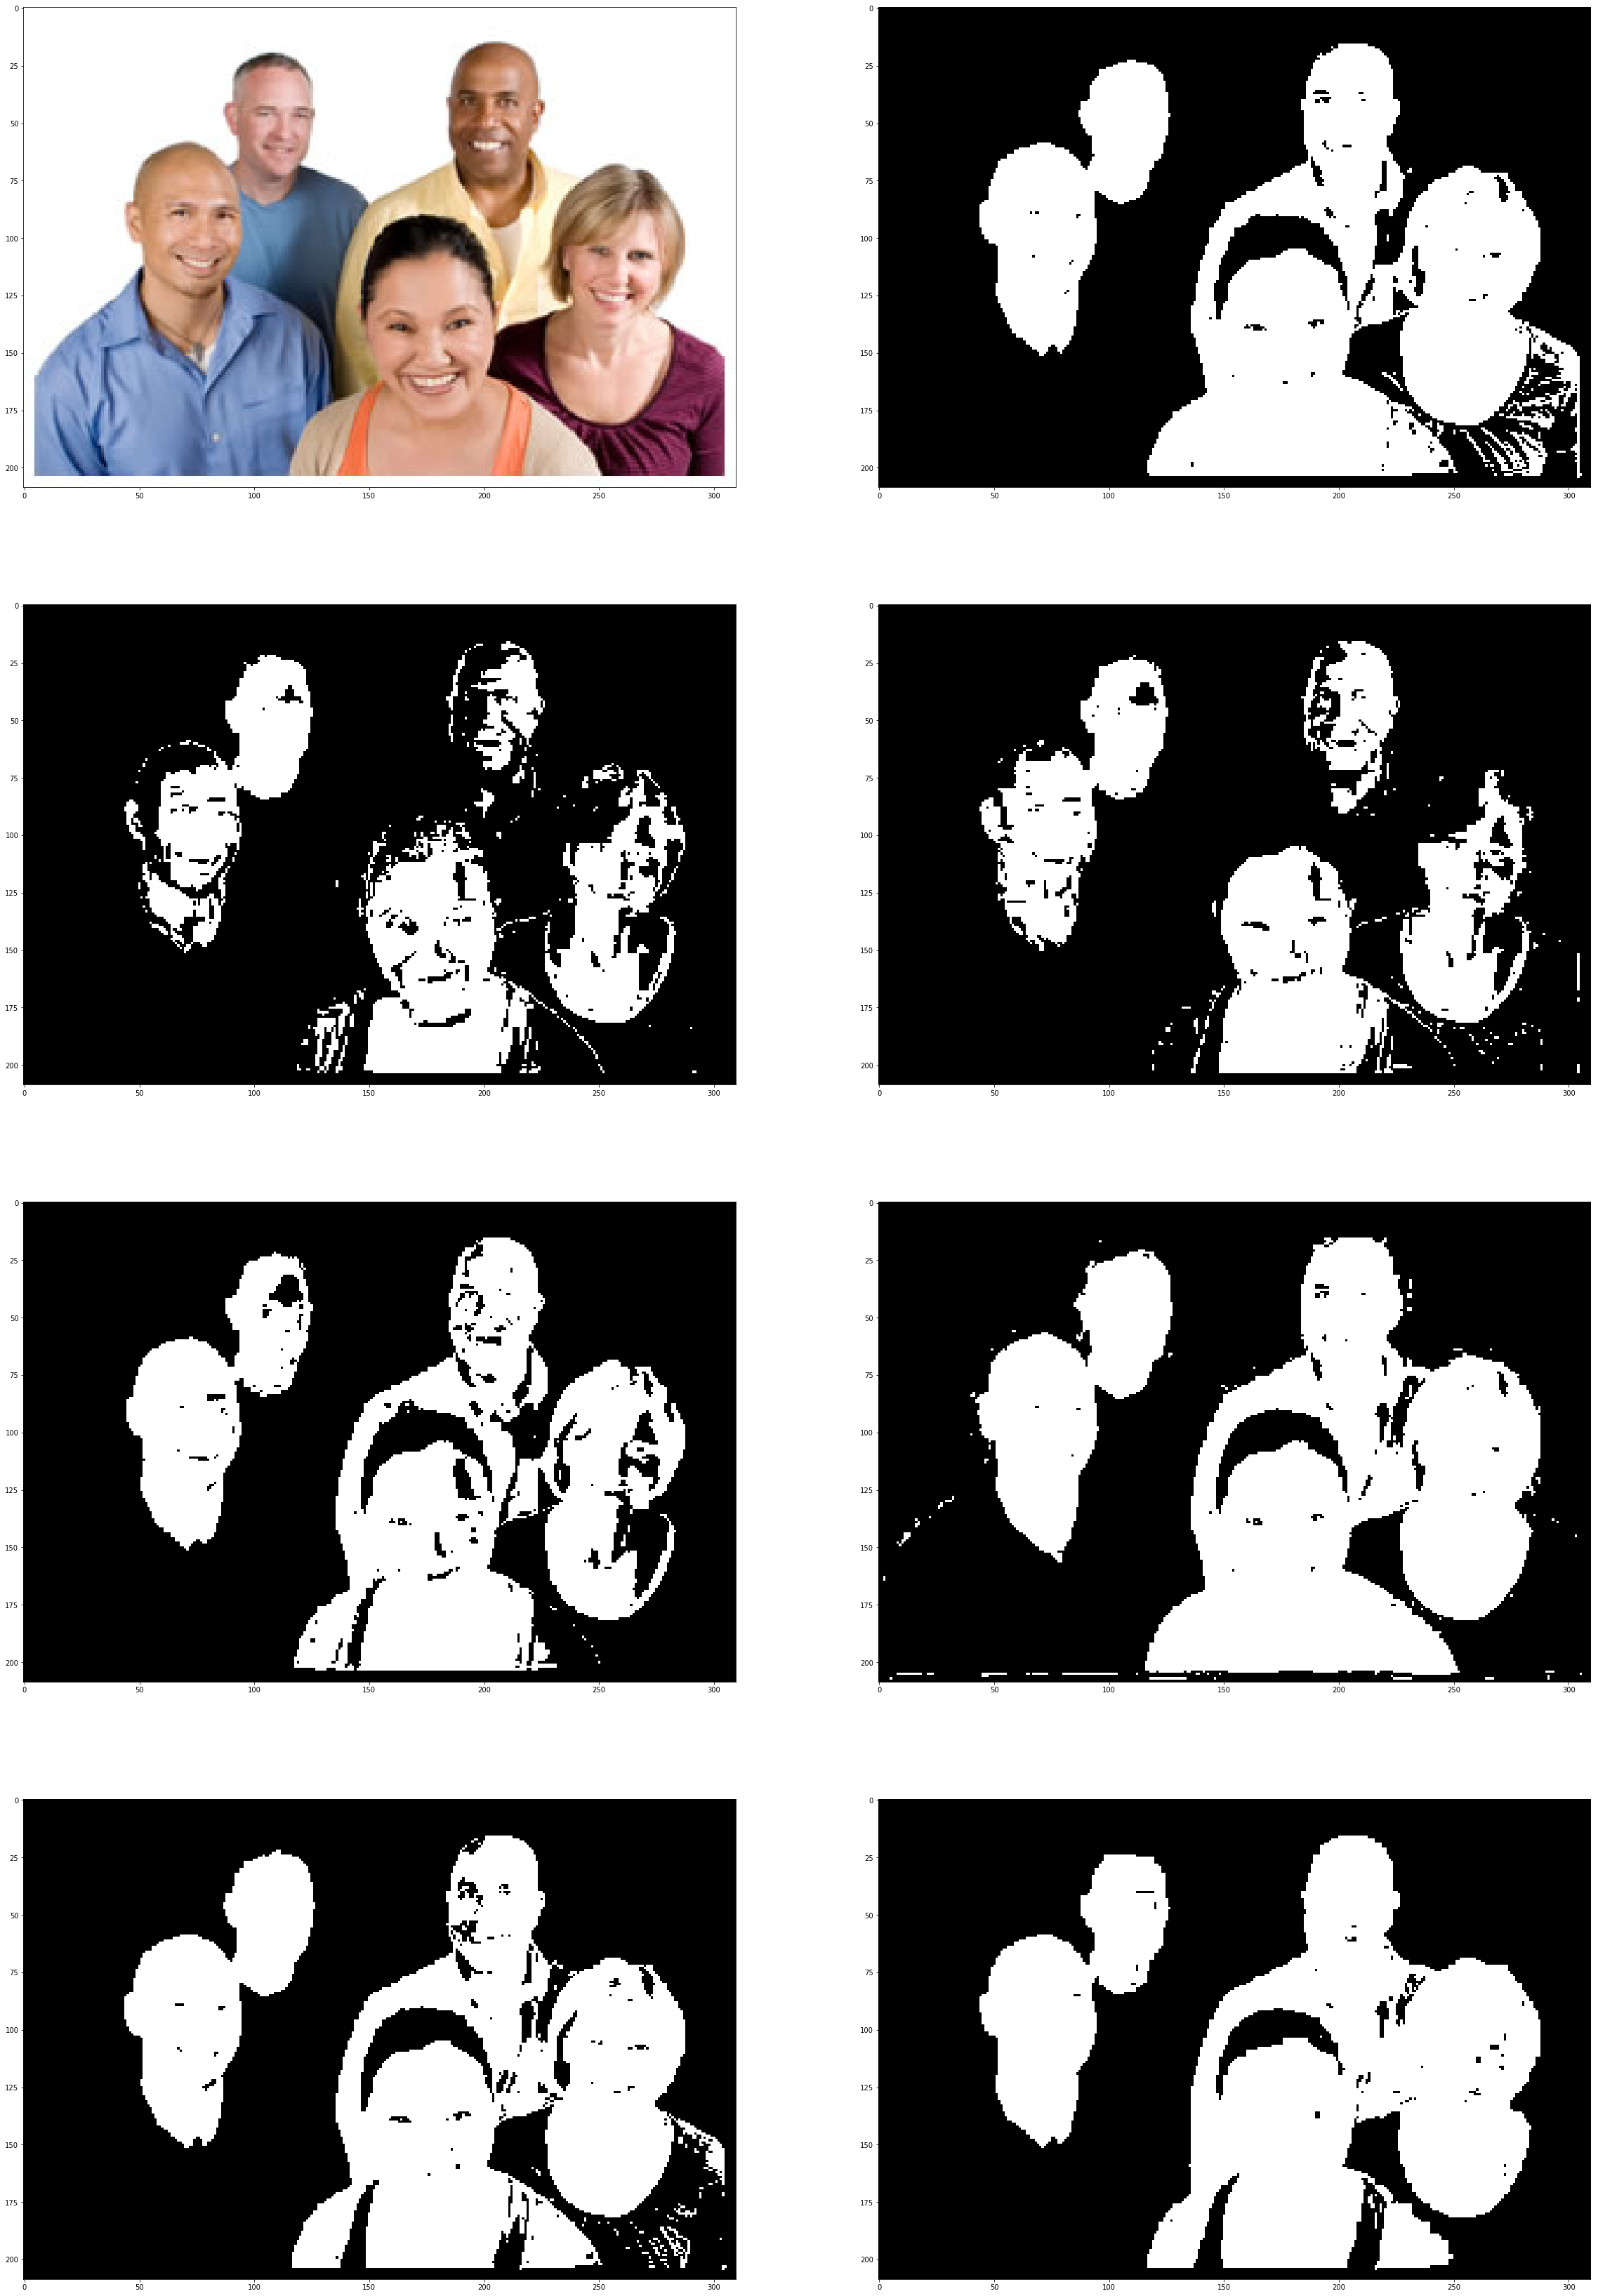

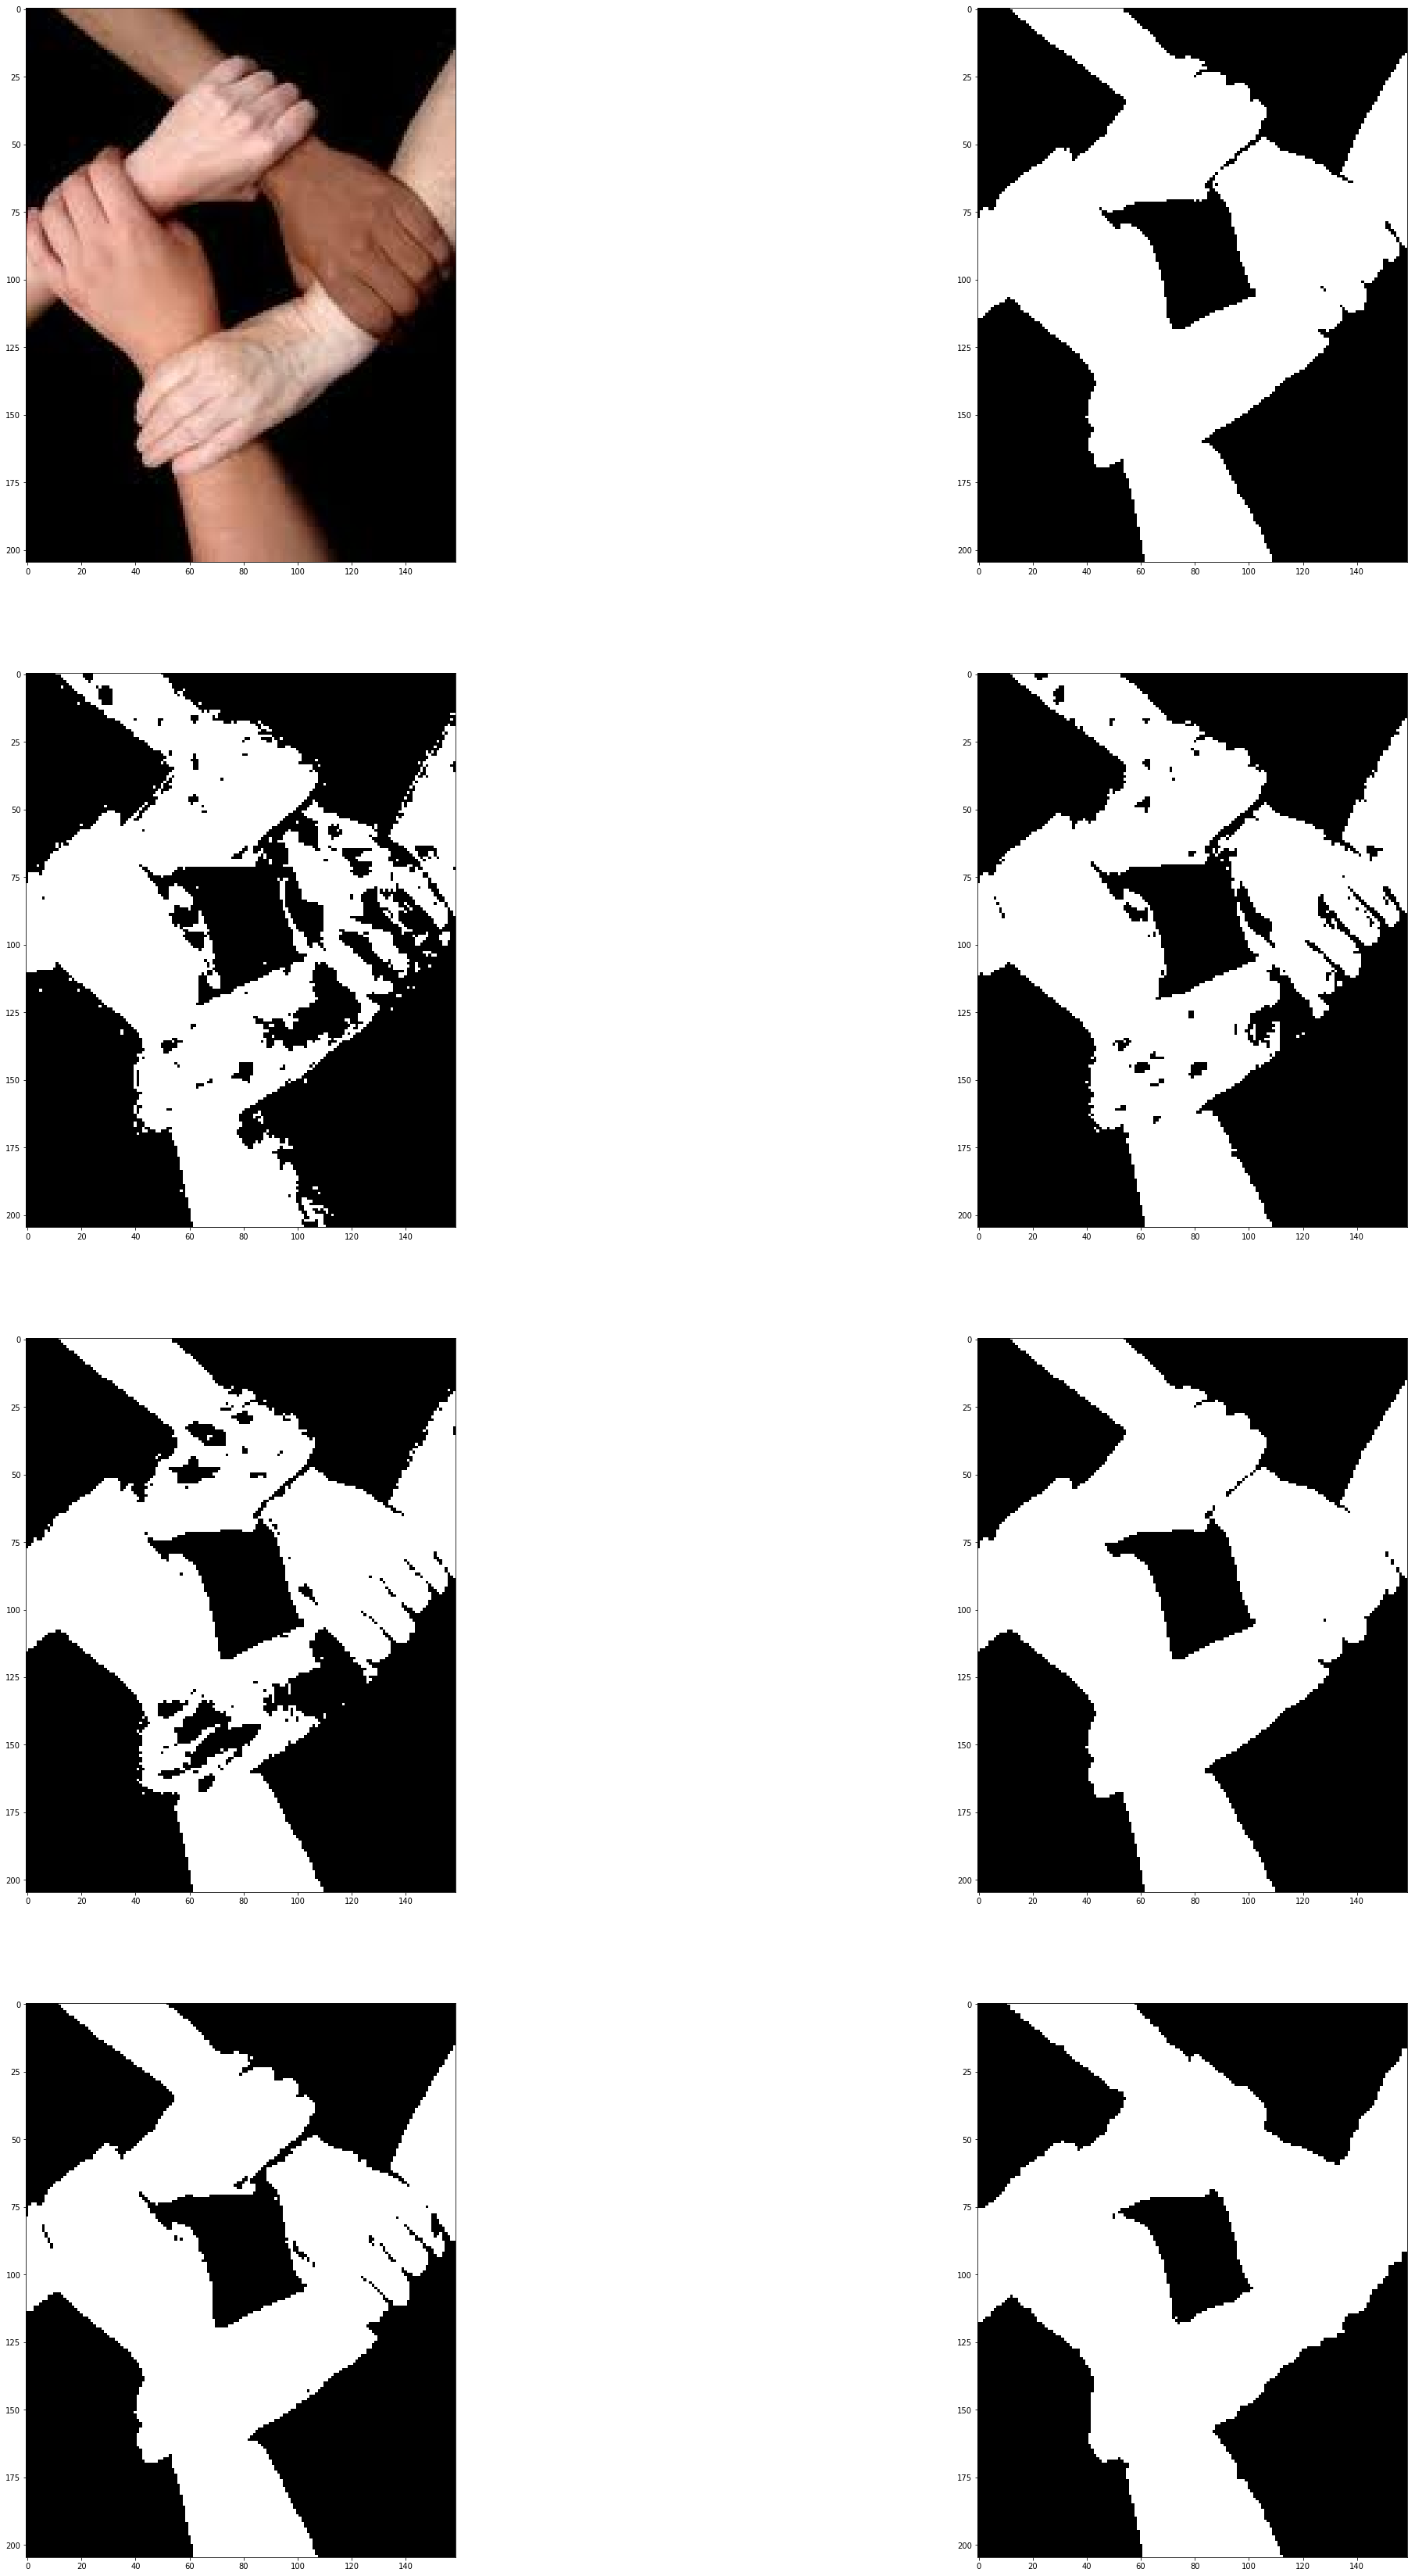

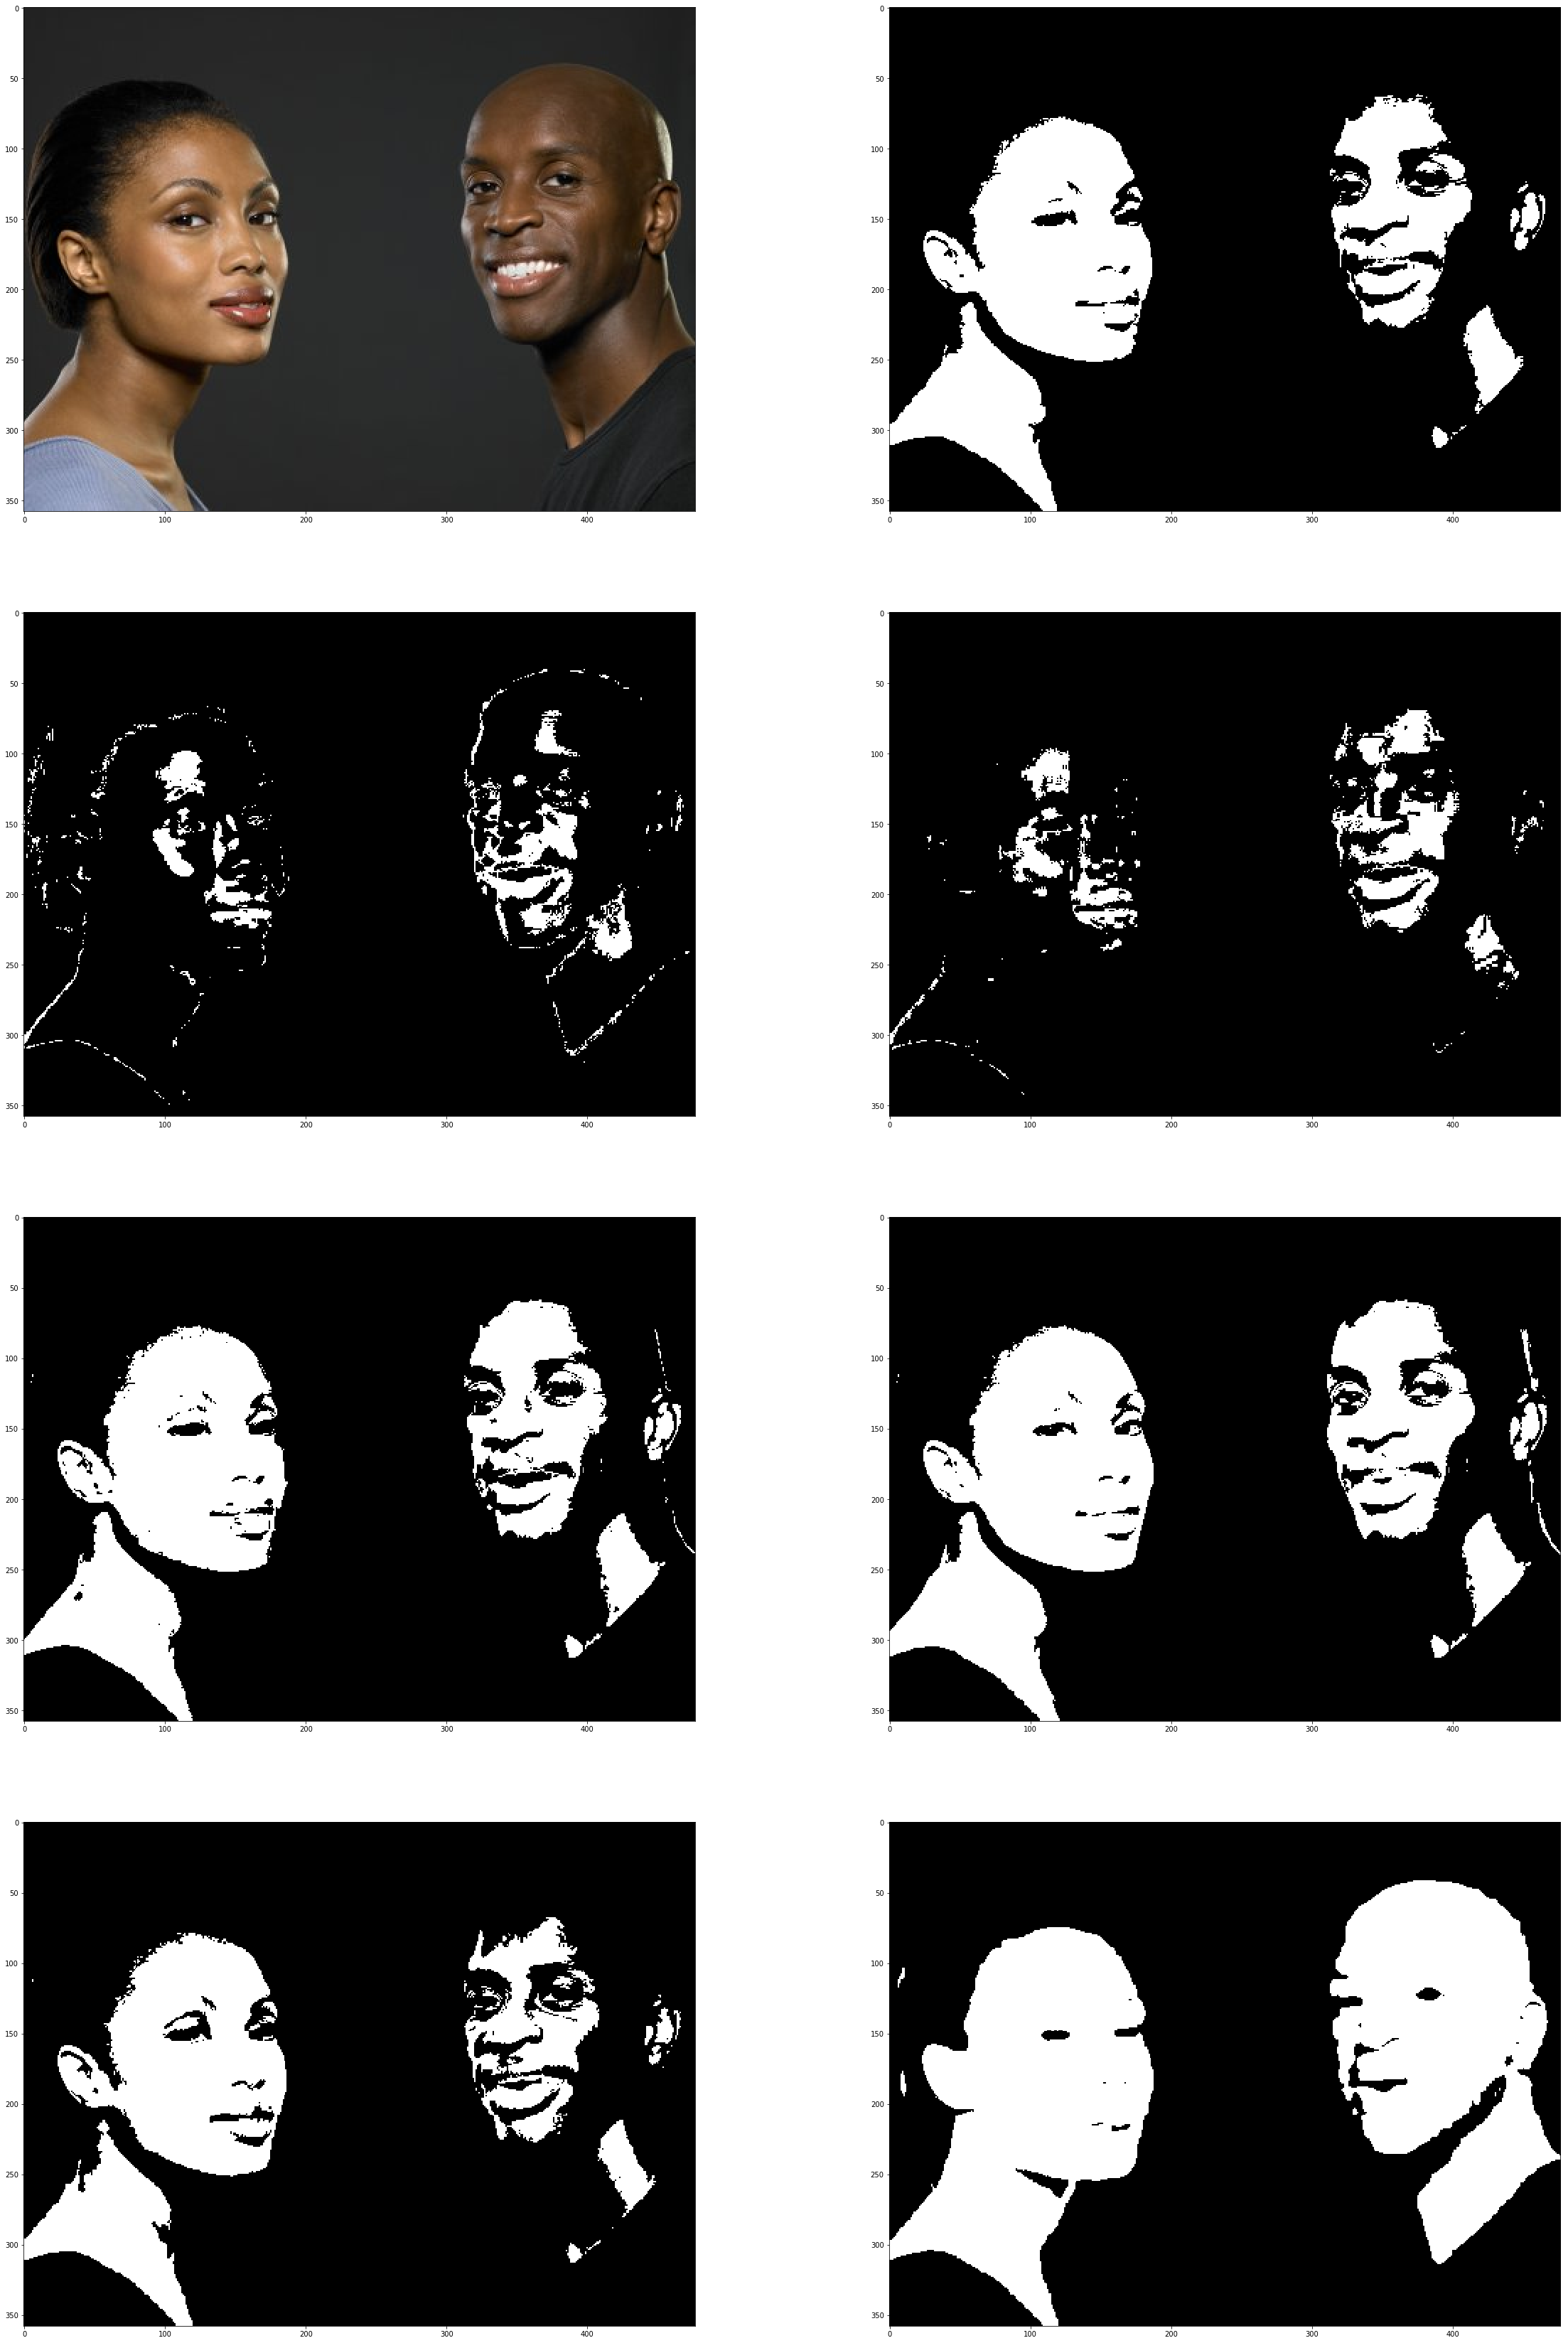

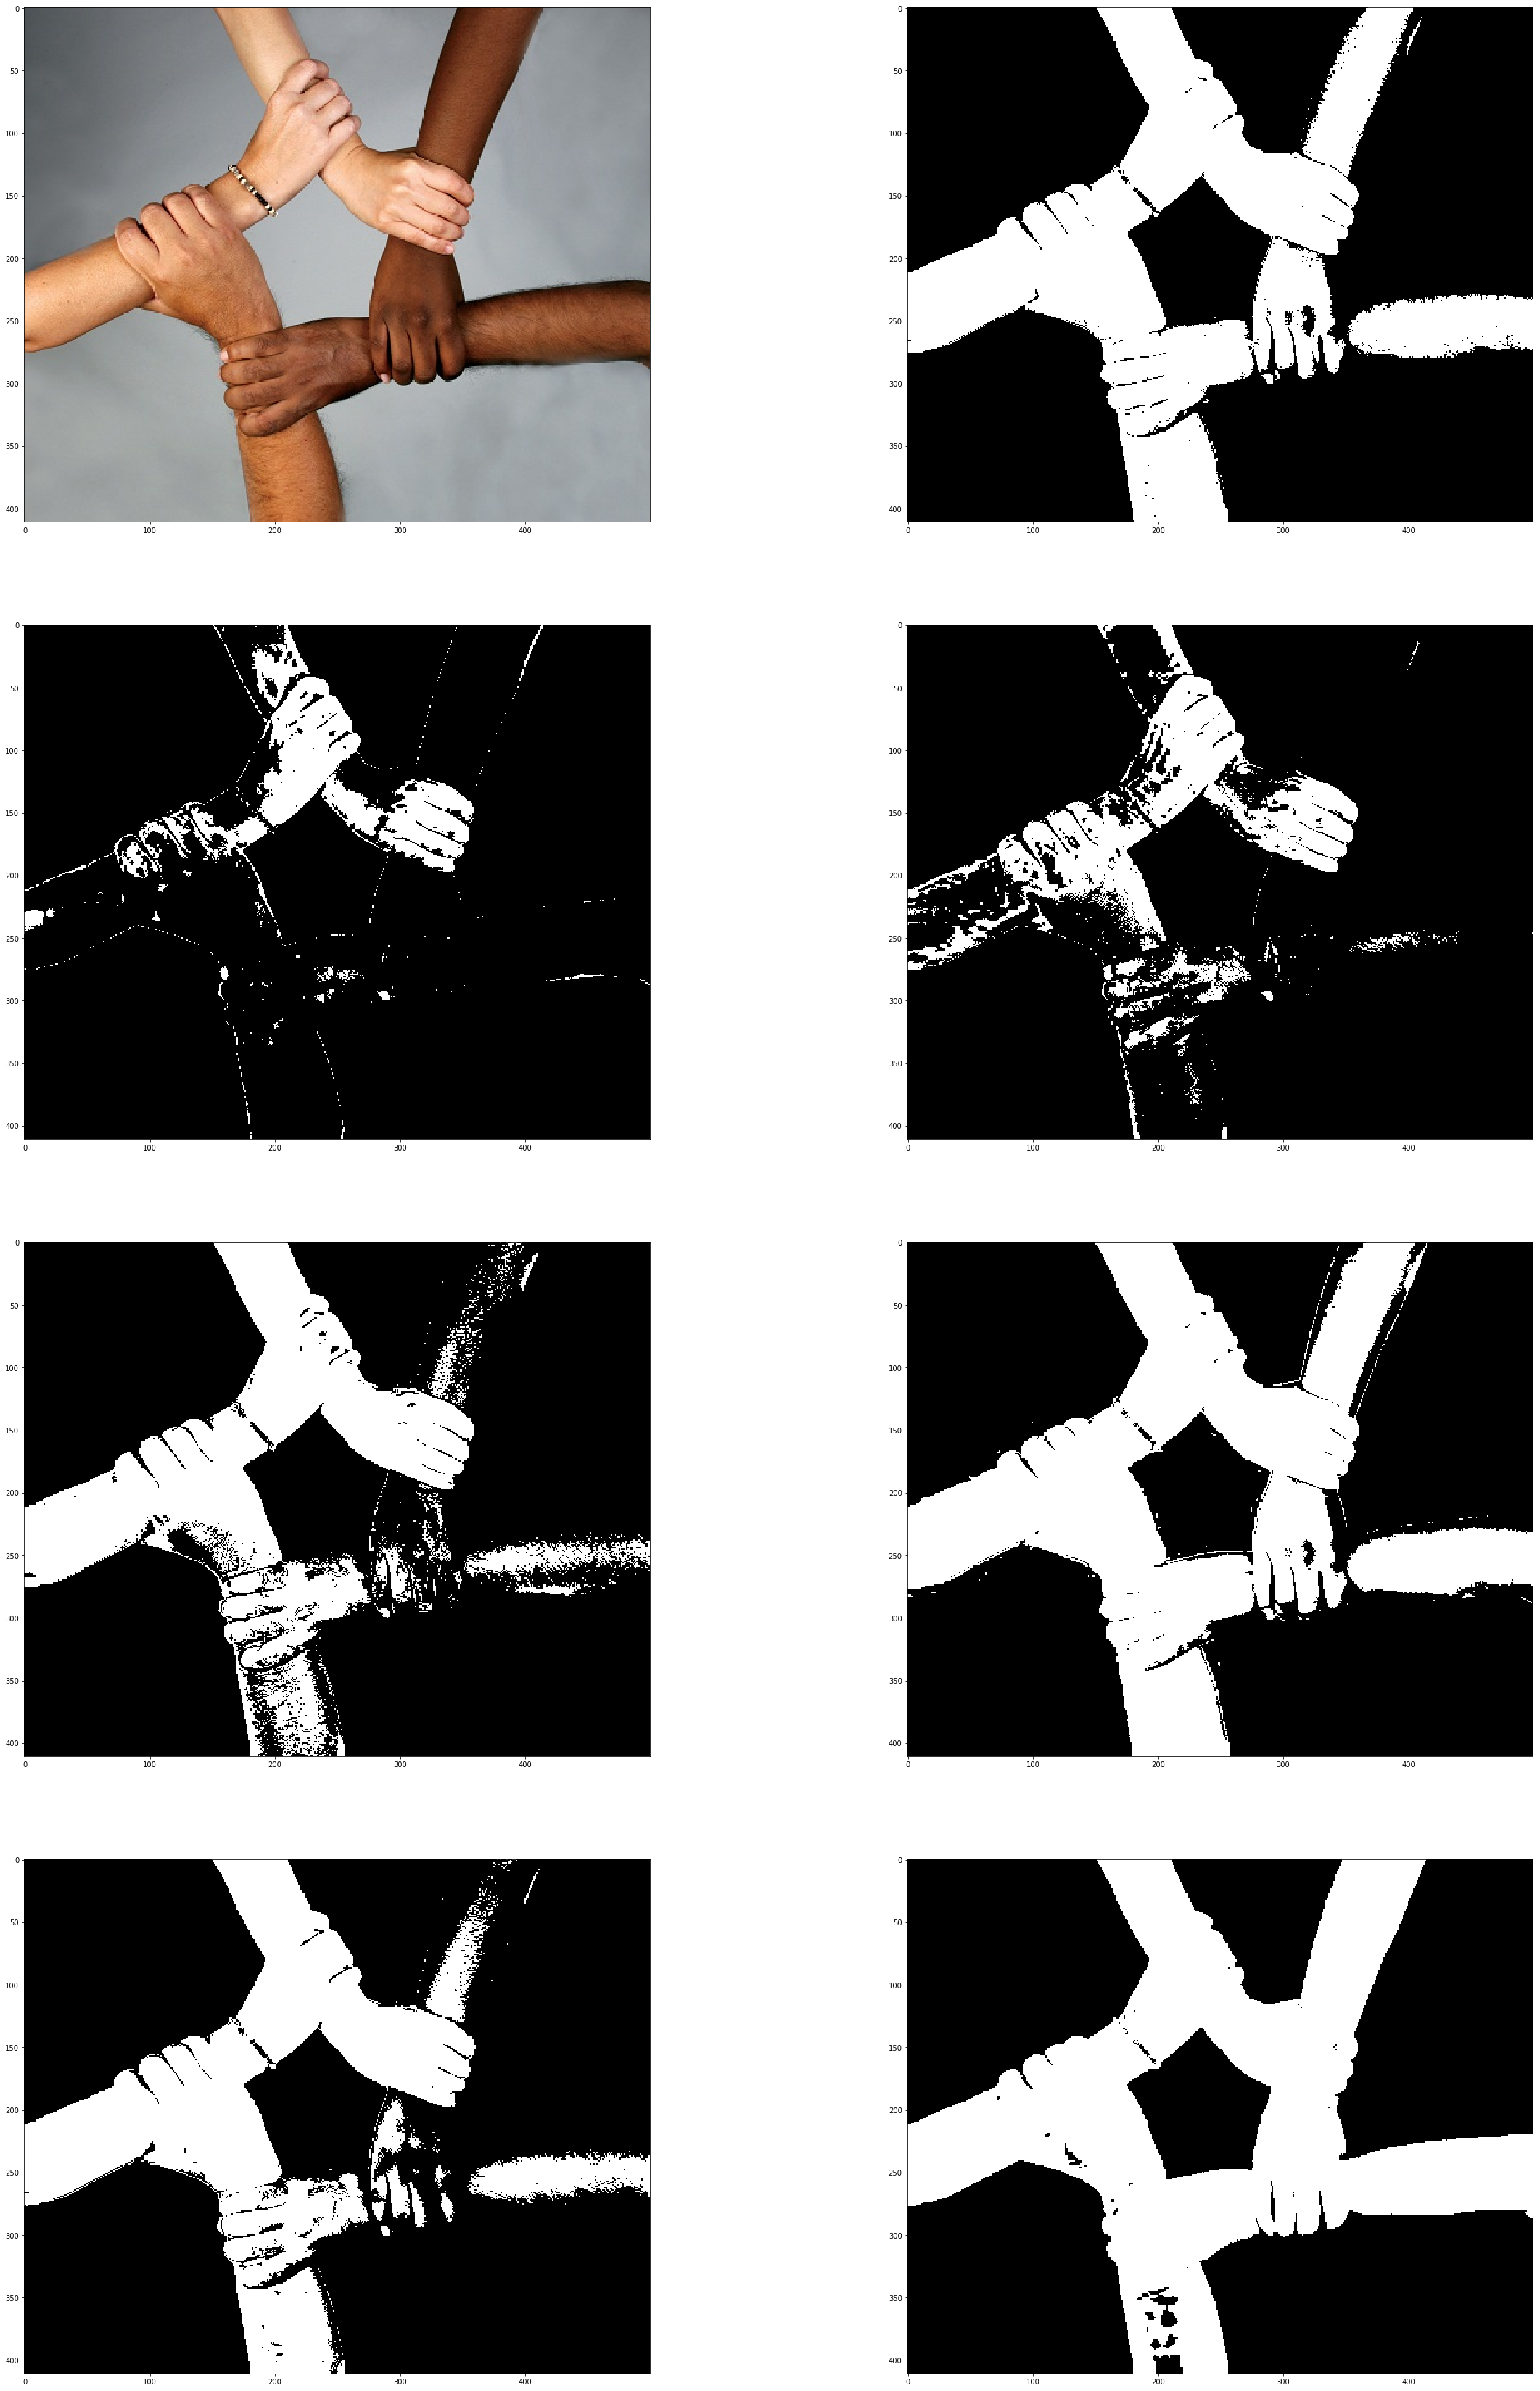

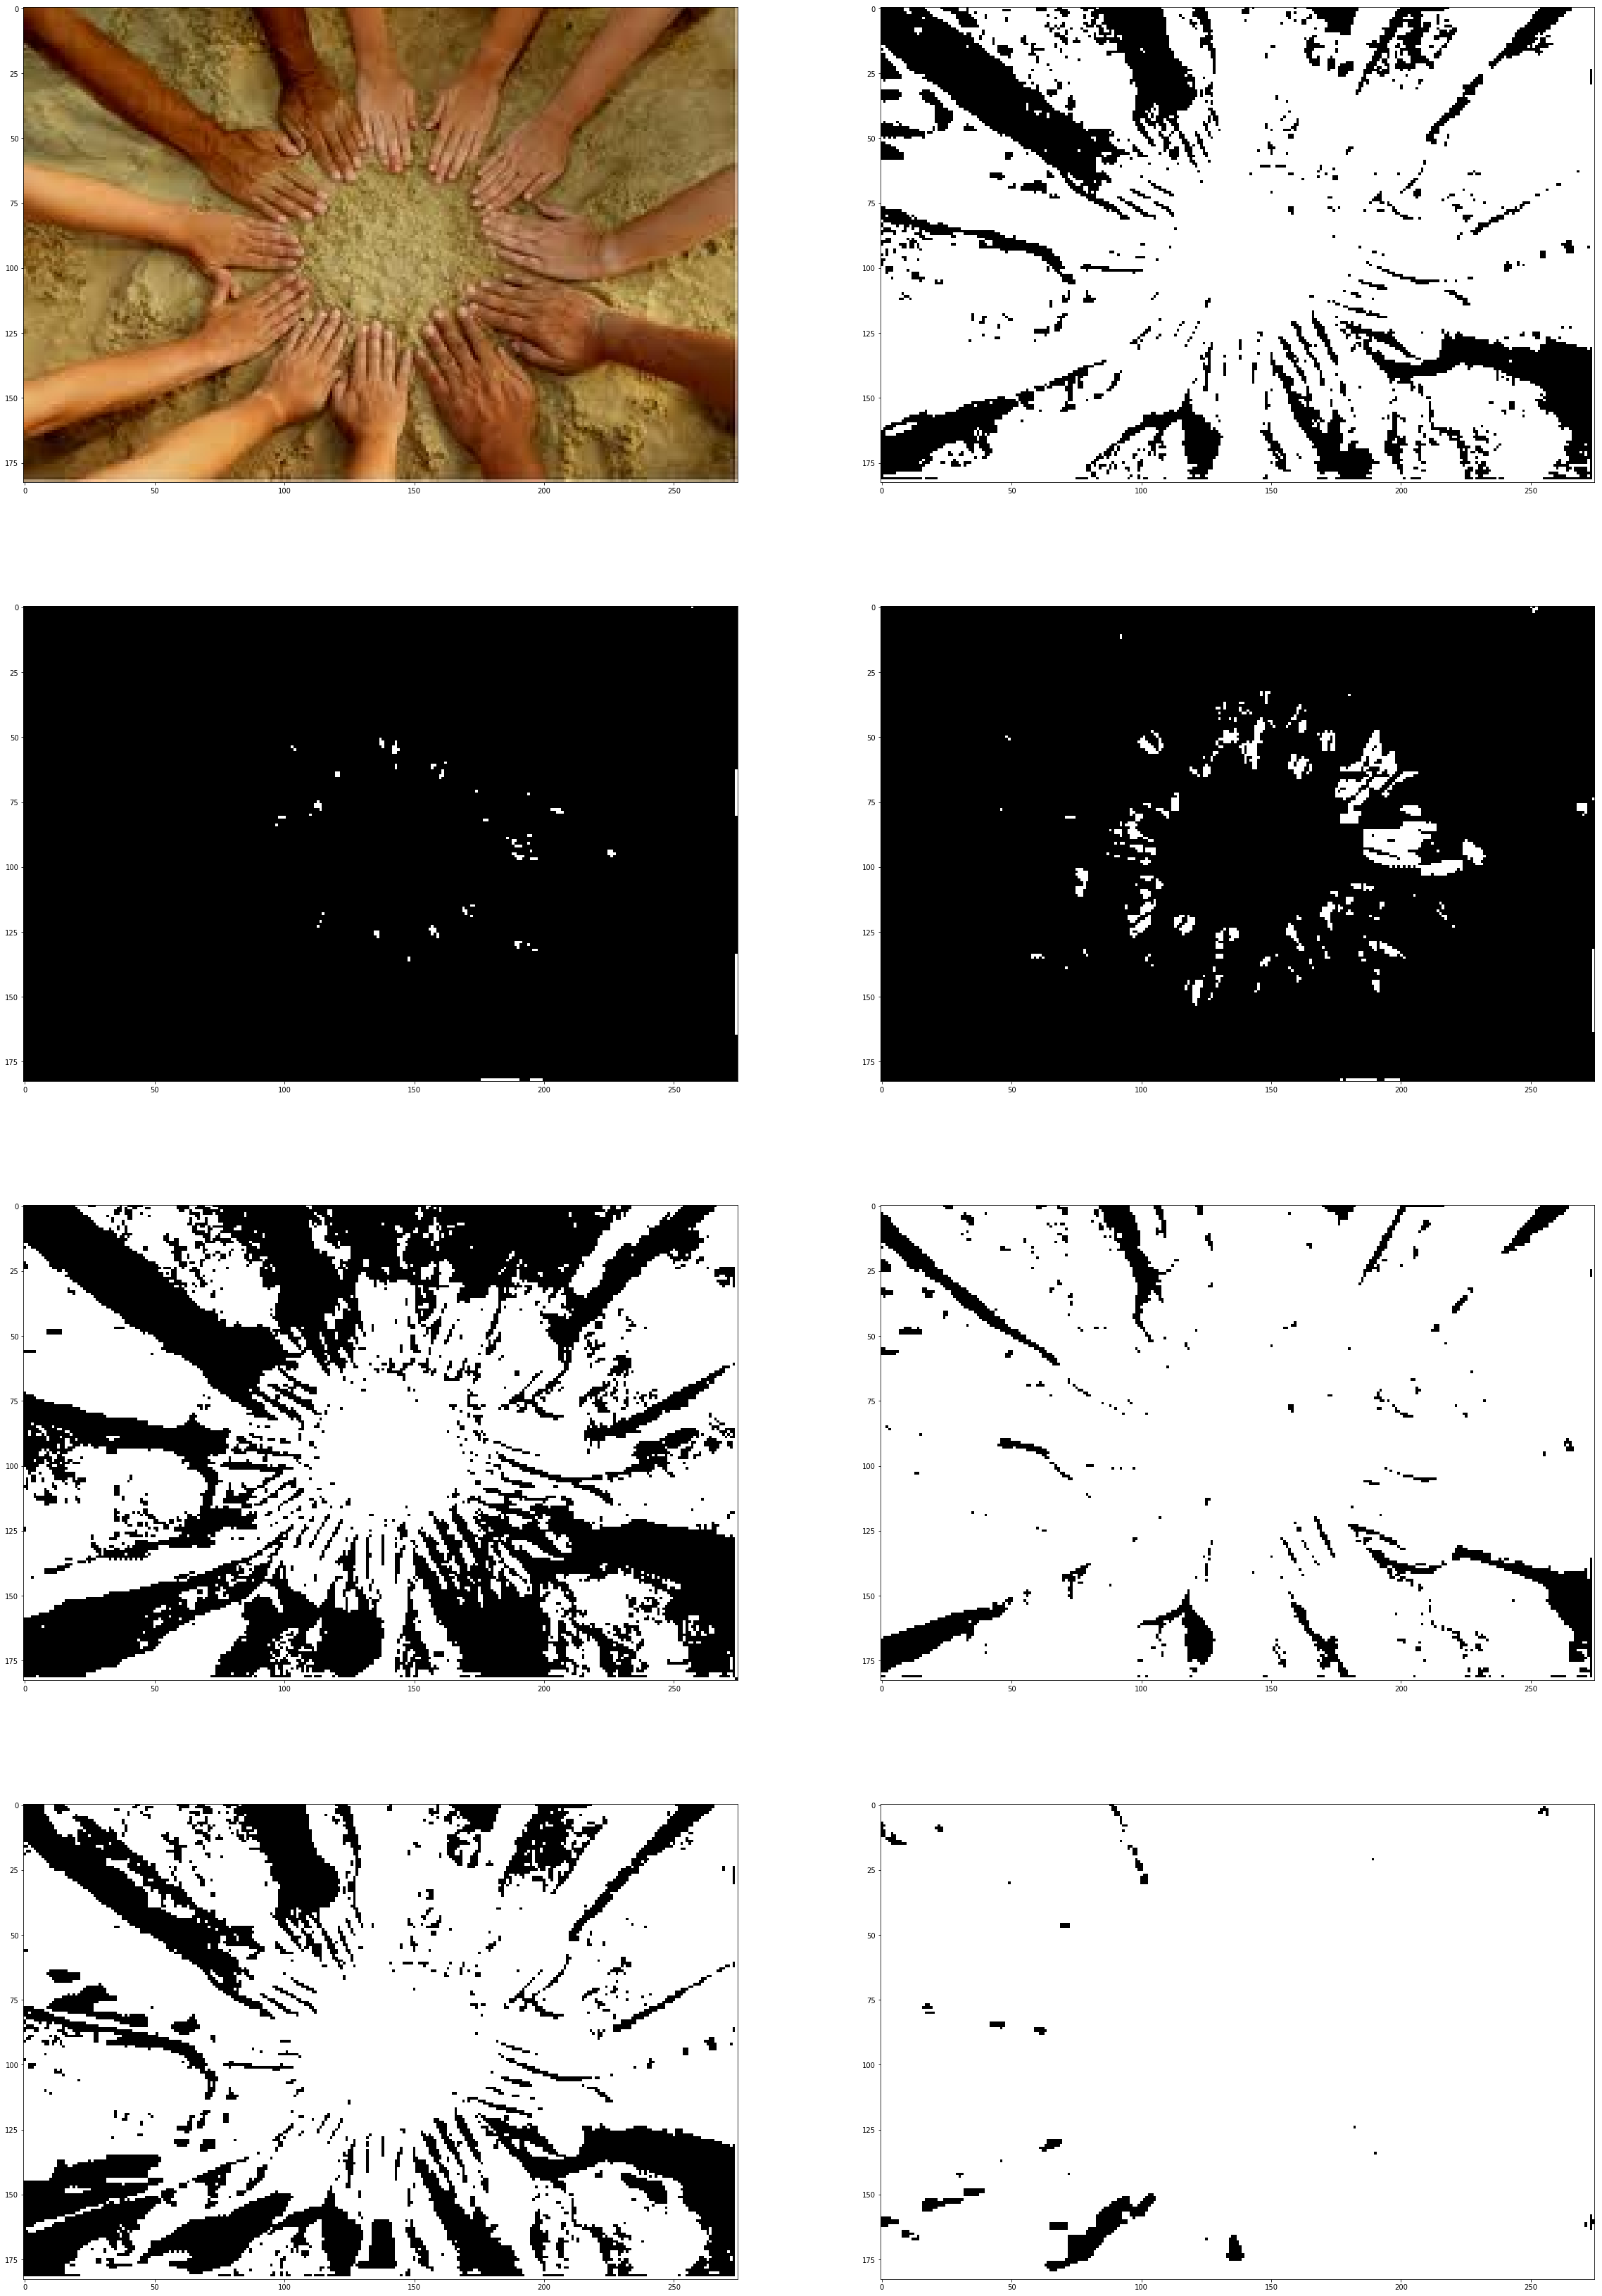

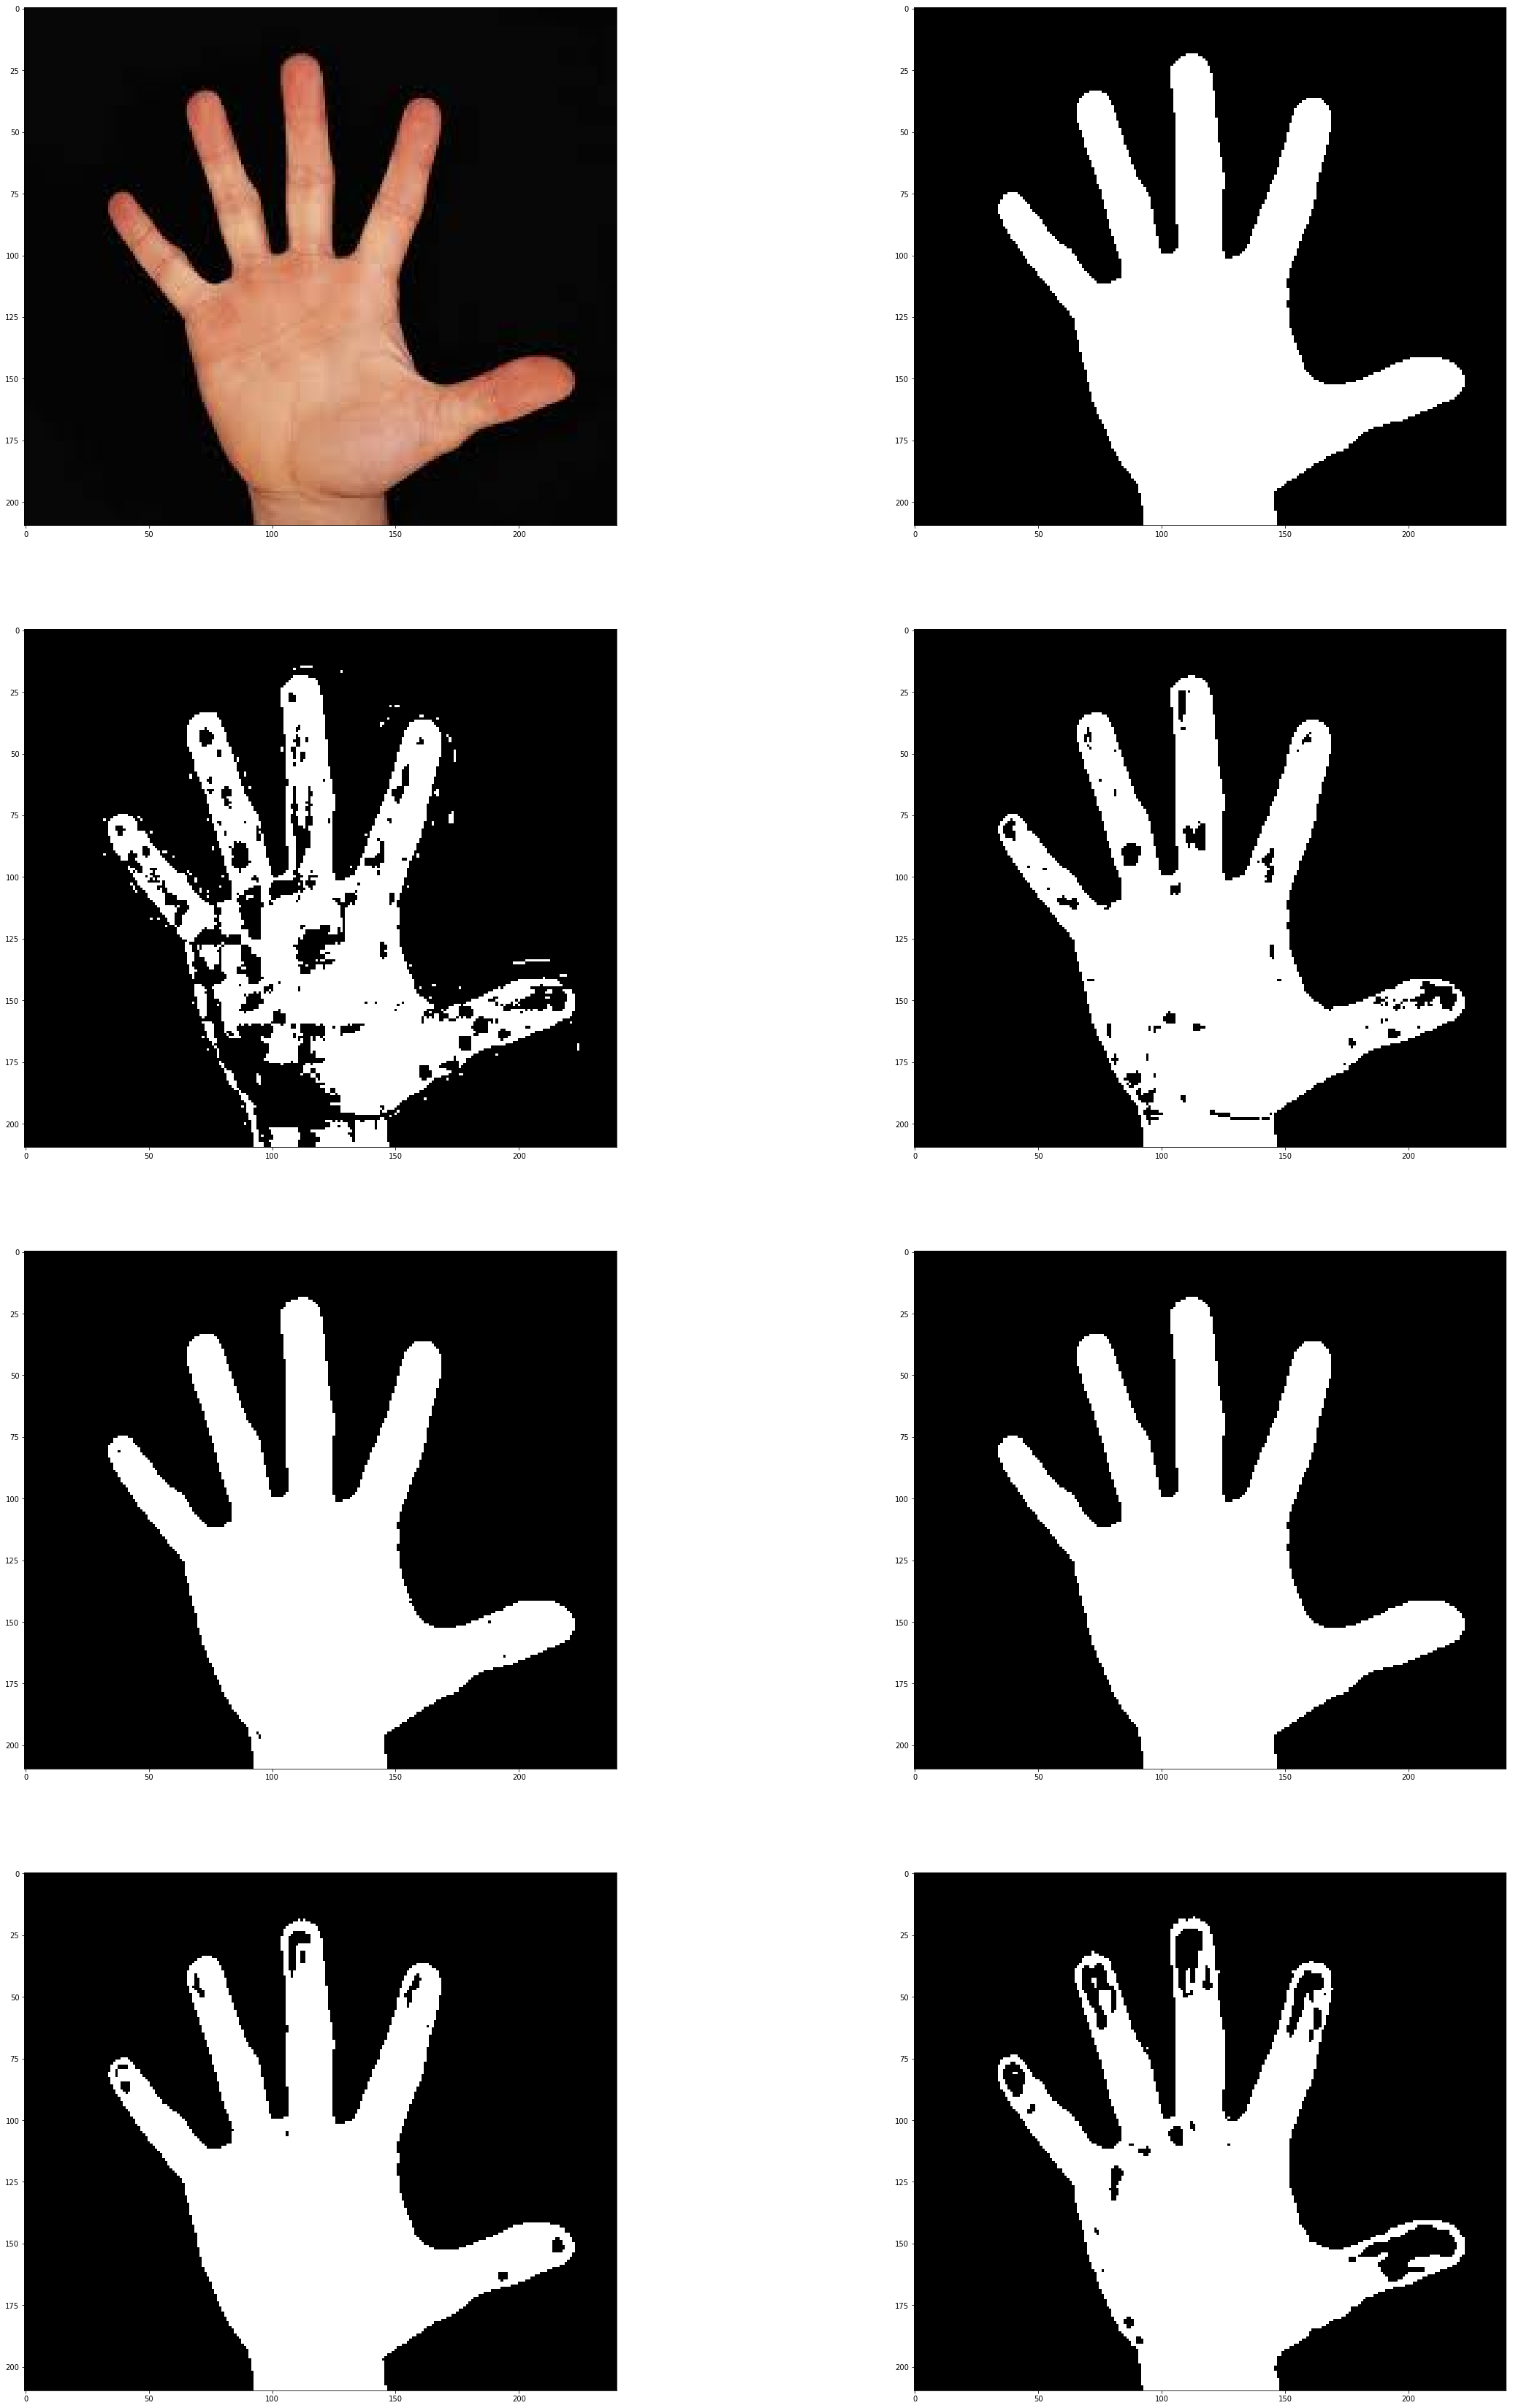

In [59]:
for img in images:
    fig=plt.figure(figsize=(40, 60))
    
    fig.add_subplot(4, 2, 1)
    plt.imshow(img)
    img1 = filterBy(img, fn_filter=fn_filter_1)
    img2 = filterBy(img, fn_filter=fn_filter_2)
    img3 = filterByHSV(img, fn_filter=fn_filter_3)
    img4 = filterByHSV(img, fn_filter=fn_filter_4)
    img5 = filterByHSV(img, fn_filter=fn_filter_5)
    img6 = filterByYCbCr(img, fn_filter=fn_filter_6)
    img7 = filterByYCbCr(img, fn_filter=fn_filter_7)
    
    fig.add_subplot(4, 2, 2)
    plt.imshow(img1)
    
    fig.add_subplot(4, 2, 3)
    plt.imshow(img2)
    
    fig.add_subplot(4, 2, 4)
    plt.imshow(img3)
    
    fig.add_subplot(4, 2, 5)
    plt.imshow(img4)
    
    fig.add_subplot(4, 2, 6)
    plt.imshow(img5)
    
    fig.add_subplot(4, 2, 7)
    plt.imshow(img6)
    
    fig.add_subplot(4, 2, 8)
    plt.imshow(img7)
plt.show()    
    
    

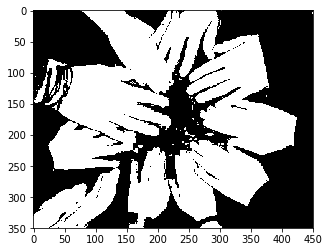

In [60]:
img1 = filterByHSV(images[2], fn_filter_5)
plt.imshow(img1)

In [61]:
pow(2,2)

4

In [62]:
hsv = cv2.cvtColor(images[0], cv2.COLOR_RGB2HSV)
hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

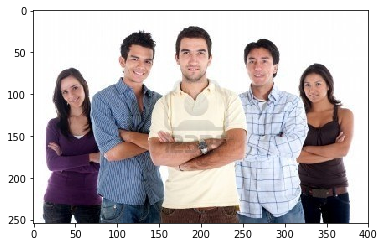

In [63]:
plt.imshow(hsv)

In [65]:
img1 = filterBy(images[0], fn_filter=fn_filter_1)
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
        img1,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
) 


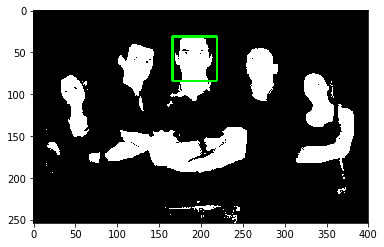

In [66]:
blackImg = img1.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(blackImg, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(blackImg)

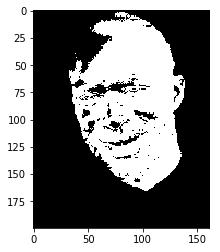

In [72]:
img4 = filterBy(images[4], fn_filter=fn_filter_2)
emoticon = img4.copy()
plt.imshow(img4)